##### *Cristina Cosma*

# **DATA SCIENCE**

## **Sprint 8. ML - Algoritmos de aprendizage no supervisado (agrupación)**

**Objectivos**
* Limpieza e interpretación de los datos.
* Preprocesados y PCA.
* Encontrar número de clústeres óptimo
* Creación de modelos no supervisados (k-means y clustering jerárquico).
* Interpretar los resultados.

___________
Entrega: Enviar la URL a un repositorio llamado *ML_unsupervised* que contenga la solución.
URL : **https://github.com/CristinaCosma/ML_unsupervised** 
___________

### **0. Importar las librerías necesarias, cargar el dataset, analizar preparar los datos**

In [728]:
%pip install --upgrade kneed 
# para que luego funcione el comando : from kneed import KneeLocator

Note: you may need to restart the kernel to use updated packages.


In [729]:
# cálculos, dataframes, uso genereal
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
# import matplotlib.cm as cmimport matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

from matplotlib.colors import ListedColormap
from matplotlib import colormaps

# list(colormaps)from matplotlib.colors import ListedColormap
from matplotlib import colormaps
# list(colormaps)

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# Importamos otras librerías necesarias

from datetime import datetime
from scipy.stats import shapiro

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')


**Información del conjunto de datos:**

***Facebook Live Sellers in Thailand*** es un conjunto de datos publicado en abril del 2019 que incluye clientes y comerciantes que venden a través de Facebook Live en Tailandia. El conjunto de datos consiste en publicaciones extraídas de las páginas de Facebook de 10 vendedores minoristas de moda y cosméticos tailandeses desde marzo de 2012 hasta junio de 2018. 

Los datos contienen 7050 observaciones y doce atributos.  Para cada publicación de Facebook, el conjunto de datos registra las métricas de participación resultantes, que incluyen compartidos, comentarios y reacciones de emojis, dentro de las cuales se distinguen los tradicionales "me gusta" de las reacciones de emoji recientemente introducidas, que son "me encanta", "wow", "jaja", "triste" y "enojado" (Dehouche 2020).

Facebook Live se ha convertido recientemente en un medio popular de venta directa, especialmente en el este y sudeste de Asia. Ofrece a los pequeños vendedores y autónomos un alto nivel de alcance y participación del consumidor y está revolucionando la venta directa. Este estudio proviene de un análisis de datos de redes sociales extraídos de Facebook para explorar los comportamientos de los usuarios y la efectividad de Facebook Live como herramienta de venta. Los resultados analizan el impacto que ha tenido el uso de Facebook Live en los patrones, la estructura estadística y el grado de participación de los consumidores, así como en la viralidad de las publicaciones. 

Específicamente, los videos en vivo generan más comentarios, reacciones emocionales, intercambio y tiempo de exposición, lo que sugiere un mayor compromiso cognitivo, afectivo y conductual con los vendedores, en comparación con otros tipos de publicaciones en Facebook. También se discuten brevemente las implicaciones y las investigaciones futuras. La variabilidad de la participación del consumidor se analiza a través de un Análisis de Componentes Principales (PCA), destacando los cambios inducidos por el uso de Facebook Live. El componente estacional se analiza mediante un estudio de las medias de las distintas métricas de engagement para diferentes franjas temporales (horaria, diaria y mensual). Finalmente, identificamos publicaciones estadísticas atípicas, que se analizan cualitativamente más a fondo, en términos de su enfoque de venta y actividades.

Fuentes : 

* https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand.
* https://github.com/ikanurlaily/Clustering-Facebook-Sellers-in-Thailand?tab=readme-ov-file#Overview
* https://www.sciencedirect.com/science/article/pii/S2352340920305552


**Información de los campos y descripción de los valores más carácterísticos:**

  * **status_id**: código que identifica una publicación. Parece compuesto de 2 valores: el primero que se repite y que posiblemente identifica al usuario y el segundo que identifica la publicación. Se debería separar en 2 columnas diferentes.

  * **status_type**: el tipo de publicación (por ejemplo, foto, enlace, video, estado).

  * **status_published**:  la fecha y hora de subida de la publicación.
    
  * **num_reactions**: el número total de reacciones recibidas en la publicación.

  * **num_comments**: el número total de comentarios realizados en la publicación.

  * **num_shares**: el número total de veces que la publicación se ha compartido.

  * **num_likes**: el número de reacciones "Me gusta" recibidas en la publicación.

  * **num_loves**: el número de reacciones "Me encanta" recibidas en la publicación.

  * **num_wows**: el número de reacciones "Me asombra" recibidas en la publicación.

  * **num_hahas**: el número de reacciones "Me hace gracia" recibidas en la publicación.

  * **num_sads**: el número de reacciones "Me entristece" recibidas en la publicación.
    
  * **num_angrys**: el número de reacciones "Me enfada" recibidas en la publicación

  * **Column1**, **Column2**, **Column3**, **Column4**: Columnas adicionales que no contienen ningún tipo de datos. Se pueden                                                           borrar del DataFrame.
  

**Objetivo del trabajo:** 

Conocer los patrones de uso, compromiso e interacción a través de métodos estadísticos y de clústering (agrupación) automatizado de Machine Learning.

    
  </div>

In [730]:
fbthai_data= pd.read_csv('PublicacionsFacebookThailandia.csv')
fbthai_data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [731]:
fbthai_data.describe().round()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.0,7050.0,7050.0,7050.0,7050.0,7050.0,7050.0,7050.0,7050.0,0.0,0.0,0.0,0.0
mean,230.0,224.0,40.0,215.0,13.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
std,463.0,890.0,132.0,449.0,40.0,9.0,4.0,2.0,1.0,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
25%,17.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
50%,60.0,4.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
75%,219.0,23.0,4.0,185.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
max,4710.0,20990.0,3424.0,4710.0,657.0,278.0,157.0,51.0,31.0,NaN,NaN,NaN,NaN


In [732]:
fbthai_data.shape

(7050, 16)

In [733]:
fbthai_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [734]:
fbthai_data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,230.0,463.0,0.0,17.0,60.0,219.0,4710.0
num_comments,7050.0,224.0,890.0,0.0,0.0,4.0,23.0,20990.0
num_shares,7050.0,40.0,132.0,0.0,0.0,0.0,4.0,3424.0
num_likes,7050.0,215.0,449.0,0.0,17.0,58.0,185.0,4710.0
num_loves,7050.0,13.0,40.0,0.0,0.0,0.0,3.0,657.0
num_wows,7050.0,1.0,9.0,0.0,0.0,0.0,0.0,278.0
num_hahas,7050.0,1.0,4.0,0.0,0.0,0.0,0.0,157.0
num_sads,7050.0,0.0,2.0,0.0,0.0,0.0,0.0,51.0
num_angrys,7050.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0
Column1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [735]:
# Vemos los valores únicos de cada uno de los atributos
fbthai_data.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

In [736]:
fbthai_data.isnull().sum() | fbthai_data.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [737]:
# Exploring status_id variable
len(fbthai_data['status_id'].unique())

6997

Vemos que hay menos observaciones de 'status_id' y 'status_published' que el total, lo que podría significar que faltan datos, o bine que están repetidos.

In [738]:
# Exploring status_published variable
len(fbthai_data['status_published'].unique())


6913

Podemos ver que hay 6913 valores únicos en 'status_published' sobre el número total de instancias del dataset, que son 7050, lo que podría significar que faltan datos, o bine que están repetidos.

In [739]:
len(fbthai_data['status_type'].unique())
fbthai_data['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Hay 4 valores en la variable'status_type' coorespondiendo a 4 tipos de comunicación en las redes sociales.

In [740]:
fbthai_data.duplicated().sum()

51

Parece que 51 filas son exactamente iguales ; veamos cuáles 

In [741]:
# ver mejor los campos duplicados

duplicated_rows = fbthai_data[fbthai_data.duplicated()]
duplicated_rows


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
6221,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0,NaN,NaN,NaN,NaN
6222,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0,NaN,NaN,NaN,NaN
6223,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0,NaN,NaN,NaN,NaN
6224,819700534875473_999880033524188,status,6/6/2018 2:20,205,39,4,197,4,4,0,0,0,NaN,NaN,NaN,NaN
6225,819700534875473_998824716963053,photo,6/4/2018 6:57,336,42,2,285,5,0,0,46,0,NaN,NaN,NaN,NaN
6226,819700534875473_997075427137982,status,6/1/2018 0:35,111,2,1,110,1,0,0,0,0,NaN,NaN,NaN,NaN
6227,819700534875473_995933077252217,photo,5/30/2018 6:33,357,18,9,352,3,1,1,0,0,NaN,NaN,NaN,NaN
6228,819700534875473_995839410594917,photo,5/30/2018 2:39,114,7,0,109,3,2,0,0,0,NaN,NaN,NaN,NaN
6229,819700534875473_995218893990302,status,5/29/2018 4:39,133,7,1,127,6,0,0,0,0,NaN,NaN,NaN,NaN
6230,819700534875473_993975437447981,photo,5/27/2018 1:31,532,32,4,480,47,5,0,0,0,NaN,NaN,NaN,NaN


In [742]:
status_id_counts = duplicated_rows['status_id'].value_counts()
print(status_id_counts)

819700534875473_1002372733274918    1
819700534875473_962032993975559     1
819700534875473_966878030157722     1
819700534875473_966629653515893     1
819700534875473_966156923563166     1
819700534875473_965614580284067     1
819700534875473_965407870304738     1
819700534875473_964582740387251     1
819700534875473_963754250470100     1
819700534875473_962799373898921     1
819700534875473_962694150576110     1
819700534875473_962061653972693     1
819700534875473_960466324132226     1
819700534875473_968264653352393     1
819700534875473_960320564146802     1
819700534875473_958291217683070     1
819700534875473_957697307742461     1
819700534875473_957599447752247     1
819700534875473_956769714501887     1
819700534875473_955793427932849     1
819700534875473_955743124604546     1
819700534875473_955149101330615     1
819700534875473_954387151406810     1
819700534875473_953048221540703     1
819700534875473_967787160066809     1
819700534875473_971940472984811     1
819700534875

Vemos que los datos duplicados son 51 rangos correspondientes a 51 filas con status_id's distintos, que son reptetidos 1 sola vez, es decir que existen las 6997 filas originales y de éstos, 51 filas enteras se han repetido. Quiere decir que, a parte, existen 2 filas no idénticas pero con el mismo 'status_id'.

In [743]:
# ver el total de los valores únicos en los elementos duplicados 
duplicated_rows.nunique()

status_id           51
status_type          3
status_published    51
num_reactions       49
num_comments        40
num_shares          20
num_likes           51
num_loves           22
num_wows            18
num_hahas            4
num_sads             7
num_angrys           4
Column1              0
Column2              0
Column3              0
Column4              0
dtype: int64

De las muestras evaluadas se desprende que 51 observaciones se encuentran duplicadas :

* Procederemos y eliminaremos lo duplicado por la columna status_id.
* Los duplicated incluyen 3 de los 4 valores exixtentes en 'status_type', y 1 que no se encuentra en estas filas.
* Todas las filas duplicadas contienen un gran número de reacciones, de comentarios, de 'compartido', de 'me gusta', de 'me encanta' y de 'wow', con unos pocos 'haha', 'caras tristes' y 'enfadado'

## **Transformaciones báscas y anális de variables**

#### **Preparar el dataset : limpieza e interpretación de los datos**


In [744]:
fbthai_data_transform = fbthai_data.drop_duplicates(keep='last')
fbthai_data_transform[fbthai_data_transform.duplicated()]


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4


Ya no tenemos duplicados

In [745]:
fbthai_data_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         6999 non-null   object 
 1   status_type       6999 non-null   object 
 2   status_published  6999 non-null   object 
 3   num_reactions     6999 non-null   int64  
 4   num_comments      6999 non-null   int64  
 5   num_shares        6999 non-null   int64  
 6   num_likes         6999 non-null   int64  
 7   num_loves         6999 non-null   int64  
 8   num_wows          6999 non-null   int64  
 9   num_hahas         6999 non-null   int64  
 10  num_sads          6999 non-null   int64  
 11  num_angrys        6999 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Seguimos teneiendo 4 columnas con datos nulos, que podemos quitar, o bien usarlas para colocar datos generados por transformaciones y renombrarlas. Haremos lo segundo.

**Observaciones:**
* Ahora solo tenemos 6999 observaciones en el conjunto de datos : exploremos el tipo de estado y otros atributos de los datos para obtener más información.
* La mayoría de los vendedores parecen estar usando una foto o un video como estado de la venta. 
* Sólo una pequeña porción de los usuarios utiliza texto para menconar su estado o la URL/enlace para publicar el anuncio.

**Pasos para seguir :** 
* Las columnas Columna1, Columna2, Columna3, Columna4 no forman parte de los datos originales ni contienen infromación. 
* Es posible que hayan aparecido en los datos debido a la conversión de formato.
* Podemos excluir estas columnas del análisis o convertrlas en datos útiles.
* Separamos la variable "status published" en "day" y "hour" y las ponemos en Column 3 y 4
* Cambiamos el formato de la columna a formato día y hora respectivamente.


#### Para objetivos del análisis estadístico, se procede a verificar las variables relacionadas con el usuario y el estátus.

In [746]:
# Make a copy of the 'status_id' column
status_id_copy = fbthai_data_transform['status_id'].copy()

# Split the copied column into 'user_id' and 'status_id' columns
fbthai_data_transform[['userID', 'postID']] = status_id_copy.str.split('_', expand=True)


In [747]:
fbthai_data_transform[['status_id']].value_counts()

status_id                       
246675545449582_326883450762124     2
246675545449582_429583263825475     2
246675545449582_935415303242266     1
246675545449582_934896833294113     1
246675545449582_934381930012270     1
                                   ..
246675545449582_1106131959503932    1
246675545449582_1103306073119854    1
246675545449582_1102277329889395    1
246675545449582_1101125083337953    1
848451358648417_978696712290547     1
Length: 6997, dtype: int64

In [748]:
fbthai_data_transform[['userID']].value_counts()


userID          
246675545449582     2635
614855718638584     1440
134115277150304     1212
1050855161656896     778
848451358648417      450
725980084255106      252
146481362756646      125
117059915488335       56
819700534875473       51
dtype: int64

Vemos que hay 9 usuarios y cada uno publica contenido con diferentes intensidades, es decir que el que menos contenido genera en el userID 819700534875473 con 51 y el que más, userID 246675545449582, genera 2635 publicaciones.

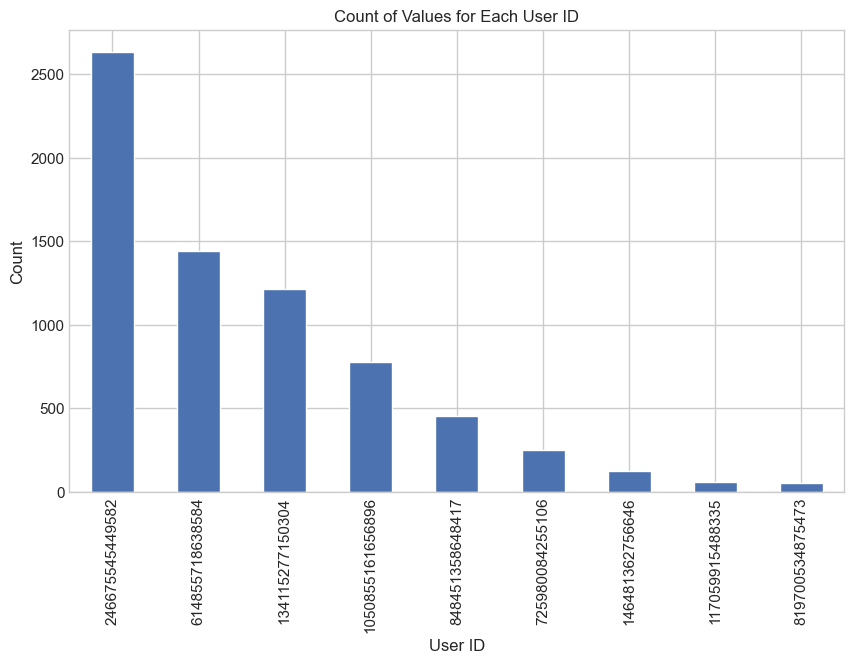

In [749]:
import matplotlib.pyplot as plt

# Count the occurrences of each user ID
user_id_counts = fbthai_data_transform['userID'].value_counts()

# Plot the bar plot
user_id_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Values for Each User ID')
plt.xlabel('User ID')
plt.ylabel('Count')
plt.show()


* Vemos que hay sólo 9 USUARIOS durante varios años (posiblemente los vendedores), lo que confirma que es un estudio de las interacciones de éstos con su público.
* Intentaremos sacar información de los datos temporales

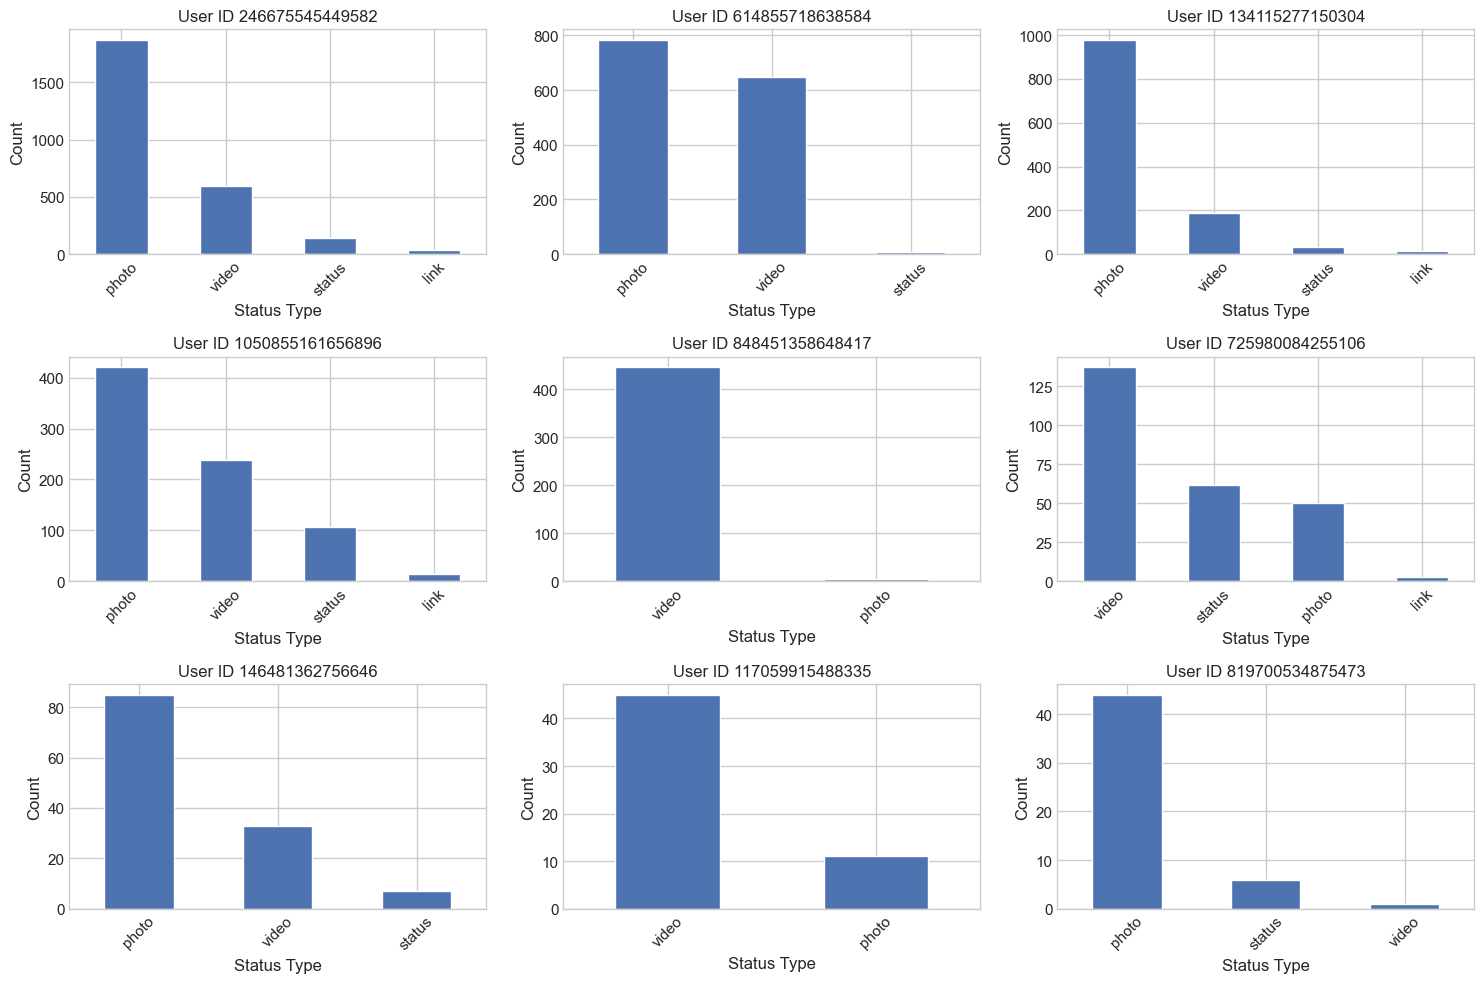

In [750]:
import matplotlib.pyplot as plt

# Group the data by 'userID' and 'status_type', and count the occurrences
user_status_counts = fbthai_data_transform.groupby('userID')['status_type'].value_counts()

# Get unique user IDs and their counts
unique_user_ids = fbthai_data_transform['userID'].unique()
user_counts = [user_status_counts[user_id].sum() for user_id in unique_user_ids]

# Sort user IDs based on counts
sorted_user_ids = [user_id for _, user_id in sorted(zip(user_counts, unique_user_ids), reverse=True)]

# Calculate number of rows and columns needed
num_rows = 3
num_cols = 3
num_plots = min(len(sorted_user_ids), num_rows * num_cols)

# Plot for each user ID
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, user_id in enumerate(sorted_user_ids[:num_plots]):
    row_index = i // num_cols
    col_index = i % num_cols
    user_data = user_status_counts[user_id]
    user_data.plot(kind='bar', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'User ID {user_id}')
    axes[row_index, col_index].set_xlabel('Status Type')
    axes[row_index, col_index].set_ylabel('Count')
    axes[row_index, col_index].tick_params(axis='x', rotation=45)

# Hide empty subplots if there are fewer plots than total number of subplots
for i in range(num_plots, num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    axes[row_index, col_index].axis('off')

plt.tight_layout()
plt.show()


El gráfico que acabamos de ver está diseñado para orderar los usuarios desde el que más cantidad de 'status_type' ha generado hasta el que menos. 
* Los 4 primeros usuarios son los más activos y el primero destaca por generar más del doble de cantidad de estatus de fotos que segundo y del tercero;
* Menos en 3 de los 9 casos, donde predominan los vídeos, la herramienta más popular son las fotos
* Entre los más activos, vemos que utilizan los 4 tipos de herramientas : foto, vídeo, status y link
* El link, o presencia de enlace disponible donde hacer click, es el menos utilizado.

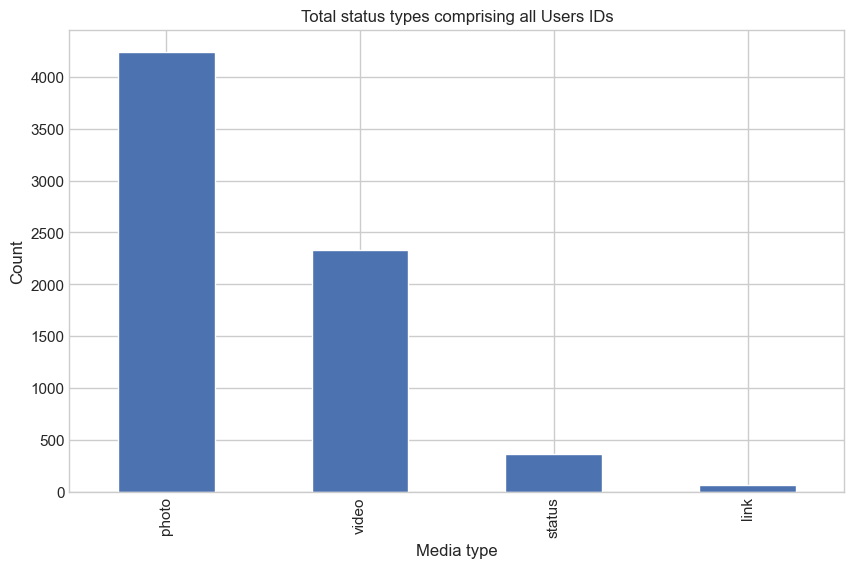

In [751]:
import matplotlib.pyplot as plt

# Count the occurrences of each user ID
user_id_counts = fbthai_data_transform['status_type'].value_counts()

# Plot the bar plot
user_id_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Total status types comprising all Users IDs')
plt.xlabel('Media type')
plt.ylabel('Count')
plt.show()

* Con el ultimo gráfico confirmamos que las fotos  son predominantes en los usuarios (vendedores) para comunicarse con los clientes, seguido de los vídeos, que son la mitad en cuanto a cantidad
* En mucho menor medida, se usan simplemente el cambio de 'status' y los enlaces.

In [752]:
fbthai_data_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         6999 non-null   object 
 1   status_type       6999 non-null   object 
 2   status_published  6999 non-null   object 
 3   num_reactions     6999 non-null   int64  
 4   num_comments      6999 non-null   int64  
 5   num_shares        6999 non-null   int64  
 6   num_likes         6999 non-null   int64  
 7   num_loves         6999 non-null   int64  
 8   num_wows          6999 non-null   int64  
 9   num_hahas         6999 non-null   int64  
 10  num_sads          6999 non-null   int64  
 11  num_angrys        6999 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
 16  userID            6999 non-null   object 


### Vamos a separar el status_published para obtener datos temporales y borrar algunas columnas que repiten datos ya transformados.

In [753]:
# separo la columna con el espacio

fbthai_data_transform[['Column3', 'Column4']] = fbthai_data_transform['status_published'].str.split(' ', expand=True)

fbthai_data_transform = fbthai_data_transform.rename(columns={'Column3': 'day', 'Column4': 'hour'})#canvio el nom a la columna
fbthai_data_transform['day'] = pd.to_datetime(fbthai_data_transform['day']) #Poso format de dia a la columna day

from datetime import datetime #Poso format hora a la columna hour
fbthai_data_transform['hour'] = fbthai_data_transform['hour'].apply(lambda x: datetime.strptime(x, '%H:%M').time())


In [754]:
# Dummy encode 'user_id' column
dummies = pd.get_dummies(fbthai_data_transform['userID'], prefix='ID', drop_first=False).astype('int64')
dummies

,ID_1050855161656896,ID_117059915488335,ID_134115277150304,ID_146481362756646,ID_246675545449582,ID_614855718638584,ID_725980084255106,ID_819700534875473,ID_848451358648417
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7045,1,0,0,0,0,0,0,0,0
7046,1,0,0,0,0,0,0,0,0
7047,1,0,0,0,0,0,0,0,0
7048,1,0,0,0,0,0,0,0,0


Obtenemos las 9 columnas dummies correspondiendo a los usuarios comerciantes 


In [755]:
# Concatenate the dummy columns with the original DataFrame
fbthai_data_transform_dummy = pd.concat([fbthai_data_transform, dummies], axis=1)

In [756]:
fbthai_data_transform_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   status_id            6999 non-null   object        
 1   status_type          6999 non-null   object        
 2   status_published     6999 non-null   object        
 3   num_reactions        6999 non-null   int64         
 4   num_comments         6999 non-null   int64         
 5   num_shares           6999 non-null   int64         
 6   num_likes            6999 non-null   int64         
 7   num_loves            6999 non-null   int64         
 8   num_wows             6999 non-null   int64         
 9   num_hahas            6999 non-null   int64         
 10  num_sads             6999 non-null   int64         
 11  num_angrys           6999 non-null   int64         
 12  Column1              0 non-null      float64       
 13  Column2              0 non-null  

**Separamos las fechas por días de fin de semana o días laborales :**

In [757]:
fbthai_data_transform_dummy['Saturday'] = fbthai_data_transform_dummy['day'].dt.weekday.isin([5]).astype(int)
fbthai_data_transform_dummy['Sunday'] = fbthai_data_transform_dummy['day'].dt.weekday.isin([6]).astype(int)
fbthai_data_transform_dummy['Workday'] = (fbthai_data_transform_dummy['day'].dt.weekday < 5).astype(int)


**Separamos las horas en periodos de publicación :**

In [758]:
# separamos las hores en periodos de publicación

def time_of_day(hour):
    if hour.hour >= 6 and hour.hour < 12:
        return 'morning'
    elif hour.hour >= 12 and hour.hour < 22:
        return 'afternoon/evening'
    else:
        return 'night'

fbthai_data_transform_dummy['time_day'] = fbthai_data_transform_dummy['hour'].apply(time_of_day)

# extrayendo los años
fbthai_data_transform_dummy['year'] = fbthai_data_transform_dummy['day'].dt.year
fbthai_data_transform_dummy.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,...,ID_246675545449582,ID_614855718638584,ID_725980084255106,ID_819700534875473,ID_848451358648417,Saturday,Sunday,Workday,time_day,year
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,...,1,0,0,0,0,0,1,0,morning,2018
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,...,1,0,0,0,0,1,0,0,night,2018
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,...,1,0,0,0,0,1,0,0,morning,2018
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,...,1,0,0,0,0,1,0,0,night,2018
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,...,1,0,0,0,0,0,0,1,night,2018


### **Anális descriptivo de las variables más interesantes**

* Vamos a proceder a algunos análisis por vendedor, por medios de comunicación típicos de redes sociales, que miraremos por fechas, horas y otras franjas temporales
* También veremos los tipos de reacciones y otros datos relativos de la audiencia hacia las publicaciones de estos comerciantes de cosméticas de FB Live en Talandia

Agrupar data por status_type (medio de comunicación) + calcular la suma de las interacciones medidas:

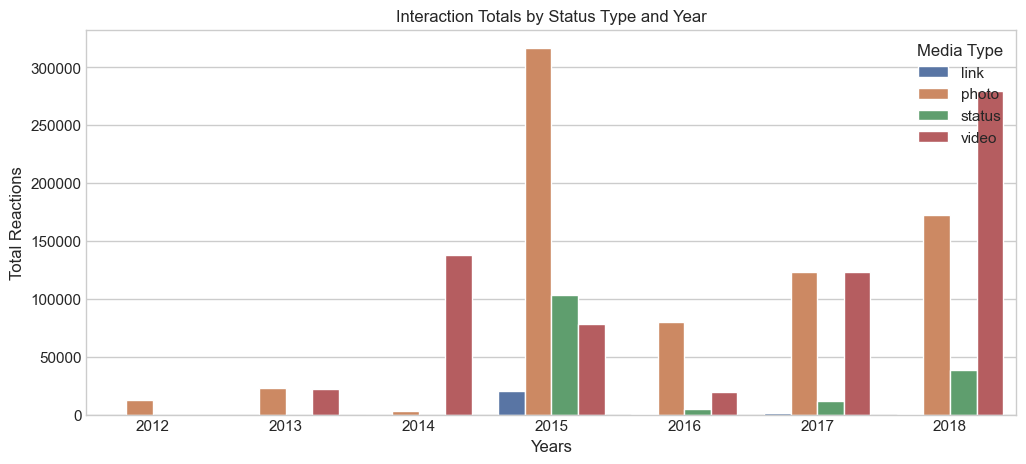

In [759]:
# Agroupar data por status_type + calcular la suma de las interacciones medidas

data_status_year = fbthai_data_transform_dummy.groupby(['status_type', 'year'])[['num_reactions', 'num_comments', 'num_shares', 'num_likes']].sum()
data_status_year = data_status_year.reset_index()


fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=data_status_year, x='year', y='num_reactions', hue='status_type', ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Total Reactions')
ax.set_title('Interaction Totals by Status Type and Year')
plt.legend(title='Media Type')
plt.show()


En cuanto a las herramientas visuales de comunicación por parte de los vendedores :

* vemos que se hubo 300 000 reacciones a fotos de estatus de perfil en 2015, cuando fueron el medio principal, seguido de los cambios de estatus (probablemente textuales, como se hacía en la época)
* en 2017 fueron a igualdad de número las fotos con los vídeos, pero en el 2018 fueron los vídeos el medio que más de usó para señalar el cambio de estátus y llamar la atención de los clientes potenciales, con unas 280 000 reacciones por este medio.
* el año 2015 a sido un año de despegue de 
* haca el final de la década, por el 2017 y 2018, los vídeos caseros o de aficionados con el auge de móviles con cámaras de calidad al alcance de todos, lo que aumentó su uso en las redes sociales ; como medio 'oficial' de comunicación, aparece también TikTok y los videos cortos, cuyo contenido se puede unir a las redes socales 'clásicas' como FB. 

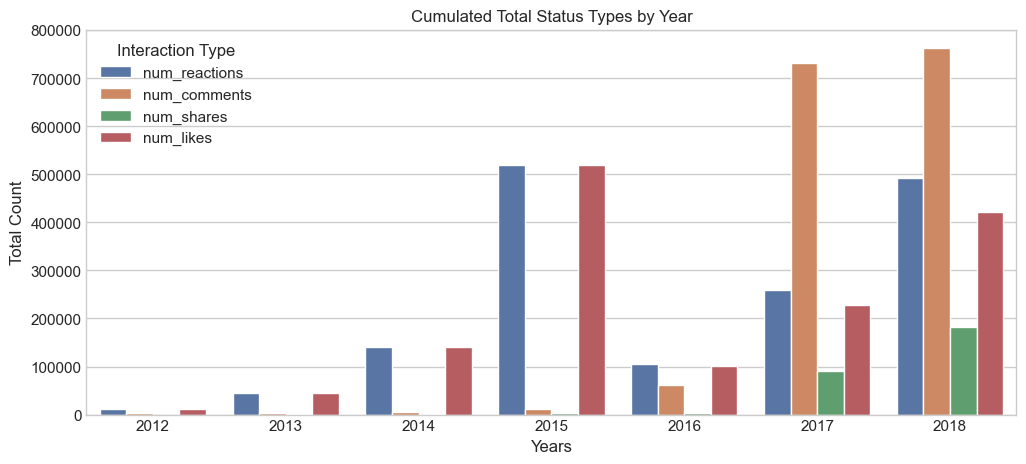

In [760]:
# Sum the counts of each status type for each year
data_status_year_cumulated = data_status_year.groupby('year')['num_reactions', 'num_comments', 'num_shares', 'num_likes'].sum().reset_index()

# Melt the DataFrame to have 'status_type' as a variable
data_status_year_cumulated_melted = data_status_year_cumulated.melt(id_vars='year', var_name='interaction_type', value_name='total_count')

# Plot the total number of status types cumulated for each year
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(data=data_status_year_cumulated_melted, x='year', y='total_count', hue='interaction_type', ax=ax)
ax.set_xlabel('Years')
ax.set_ylabel('Total Count')
ax.set_title('Cumulated Total Status Types by Year')
plt.legend(title='Interaction Type')
plt.show()


* En cuánto a los números de interacciones por parte de los usuarios, vemos que los años más activos son 2017 y 2018, donde se disparan los comentarios de la audiencia y los shares de los clientes con otros clientes potenciales.
* Puede ser que gracias a que los usuarios (vendedores) hayan aumentado su uso de vídeos en 2017 y 2018, se hayan generado mayor cantidad de reacciones por parte de la audiencia en éstos años que los años anteriores.
* Podríamos decir que los cambios de 'staus' y las fotos que los vendedores publicaban en 2015, sobretodo en el caso de 'status' a secas, no tenían sus frutos, viendo qwue fue un año con vendedores muy activos mandando fotos y cambios de estátus, pero obteniendo relativamente pocas reacciones. 
* el esfuerzo y la popularidad de vdeos de calidad (con la mejora de los móviles) ha hecho que desde entonces el esfuerzo de los usuarios vendedores por obtener visibilidad haya sido más efectivo, generando muchísima interacción

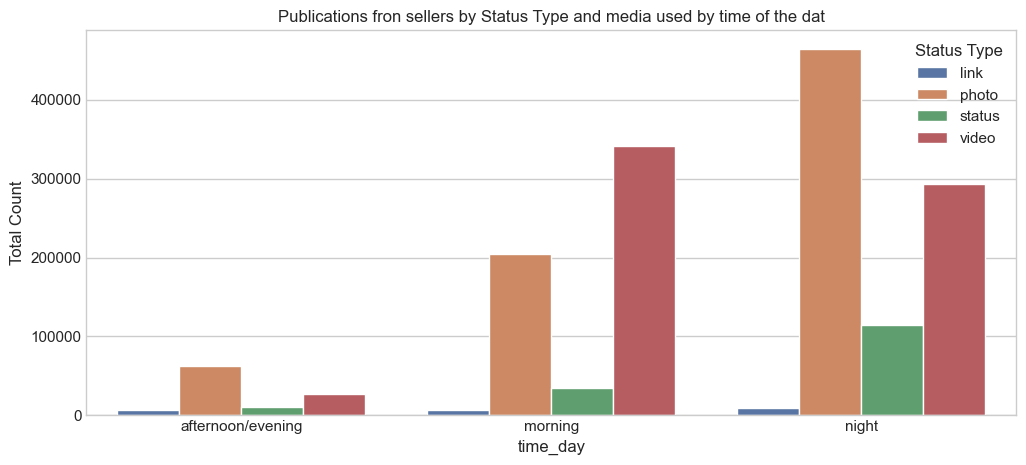

In [761]:
# Group by 'time_day' and 'status_type' and sum the counts of interactions
data_status_timeday = fbthai_data_transform_dummy.groupby(['time_day', 'status_type'])[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves']].sum().reset_index()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 5))

# Generate the grouped bar plot
sns.barplot(data=data_status_timeday, x='time_day', y='num_reactions', hue='status_type', ax=ax)
ax.set_ylabel('Total Count')
ax.set_title('Publications fron sellers by Status Type and media used by time of the dat')
plt.legend(title='Status Type')

plt.show()


Los las interacciones y las publicaciones de los comerciantes parecen hacerse sobretodo en las horas nocturnas y por la mañana, quizás sea después de cenar y antes de dormir, incluso  durmiendo tarde, puesto que la franja nocturna que se asignó es de tarde noche hasta las 5 de la mañana, y la de 'mañana' incluye la madrugada, la hora de desayuno y hasta mediodía.

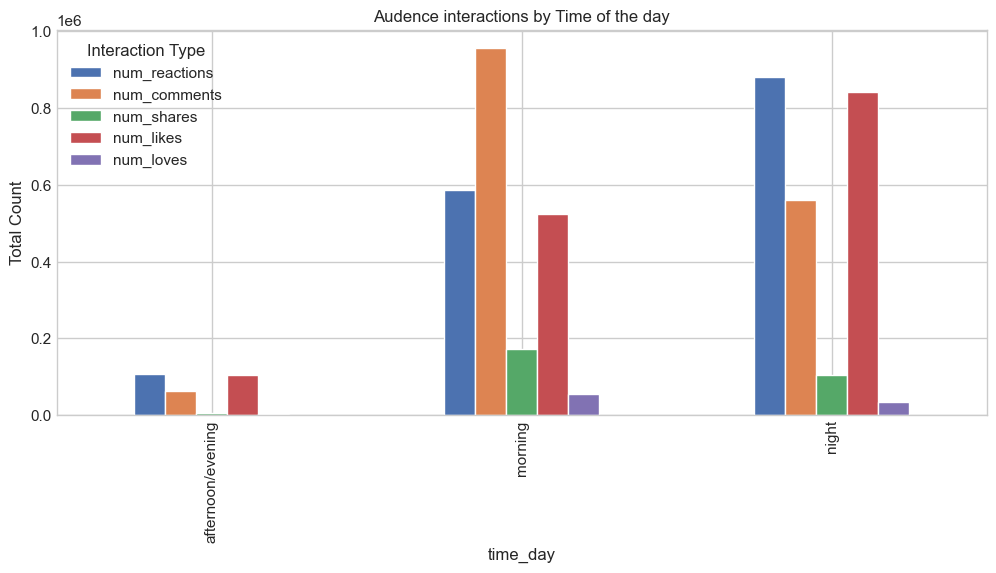

In [762]:
data_status_timeday = fbthai_data_transform_dummy.groupby('time_day')[['num_reactions', 'num_comments', 'num_shares', 'num_likes','num_loves']].sum()
data_status_timeday = data_status_timeday.reset_index()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 5))

# Generate the grouped bar plot

data_status_timeday.plot(kind='bar', x='time_day', y=['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves'], ax=ax)
ax.set_ylabel('Total Count')
ax.set_title('Audence interactions by Time of the day')
plt.legend(title='Interaction Type')

plt.show()

* Por la tarde (de 12h a 22h), es cuando hay menos interacciones, por lo que podemos pensar que la gente está ocupada trabajando u ocupándose de su hogar y su família
* Aparentemente, las publicaciones generan una cantidad parecida de reacciones en los clientes por la mañana (de 5h a 12h) que por la noche (de 22h a las 5h del día siguiente), pero cambia la proporción en cuanto a los tipos, mientras que los vendedores son más activos por la noche.
* Por la mañana se generan más comentarios escritos mientras de noche predominan las reacciones cortas y los "likes"
* Podrámos pensar que se trabaja muchas horas de día y se duerme poco por la noche, cuando hay mucha actividad en la red social...

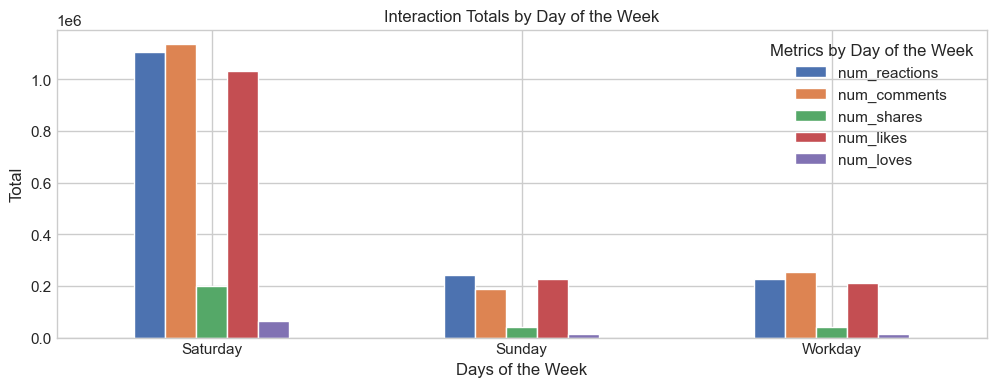

In [763]:
# Datos para el gráfico
dataday = fbthai_data_transform_dummy.groupby(['Saturday', 'Sunday', 'Workday'])[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves']].sum()

# Create a single plot
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the data
dataday.plot(kind='bar', ax=ax)
ax.set_xticklabels(['Saturday', 'Sunday', 'Workday'], rotation=0)
ax.set_xlabel('Days of the Week')
ax.set_ylabel('Total')
ax.set_title('Interaction Totals by Day of the Week')
ax.legend(title='Metrics by Day of the Week')

plt.show()


Finalmente, acabamos de ver que la audiencia está mucho más activa los sábados que el resto de días.

## Limpieza del dataset para proceder a los algorítmos no supervisados

K-means puede utilizarse con columnas dummificadas, incluso si hay muchos ceros. El algoritmo de agrupamiento K-means opera en datos numéricos, y las variables ficticias, que son binarias (0 o 1), pueden tratarse como tal.

En el contexto del agrupamiento, la presencia de ceros en columnas dummificadas no es problemática. Estos ceros representan la ausencia o la no ocurrencia de una categoría o característica particular, y contribuyen a los cálculos de distancia entre los puntos de datos. El agrupamiento K-means calcula centroides en función de los valores numéricos de las características, y asigna puntos de datos a grupos en función de sus distancias a estos centroides.

Sin embargo, es importante tener en cuenta que la escala de las características puede afectar los resultados del agrupamiento. Las características con escalas más grandes pueden dominar los cálculos de distancia, lo que lleva a resultados de agrupamiento sesgados. Por lo tanto, a menudo se recomienda estandarizar o normalizar los datos antes de aplicar el agrupamiento K-means para asegurar que todas las características contribuyan por igual a los cálculos de distancia.

En general, la mayoría de las implementaciones del algoritmo K-means esperan datos de entrada numéricos, ya que el algoritmo calcula distancias entre puntos de datos en un espacio multidimensional. Por lo tanto, los valores de fecha y hora u otros tipos de datos no numéricos no se pueden usar directamente como entrada para el agrupamiento K-means.

Si su conjunto de datos contiene valores de fecha y hora u otras características no numéricas que desea incluir en el análisis de agrupamiento, generalmente deberá preprocesar o transformar estas características en un formato numérico antes de aplicar el agrupamiento K-means. Las técnicas comunes para codificar características categóricas o no numéricas incluyen la codificación one-hot, la codificación de etiquetas o la conversión de valores de fecha y hora en representaciones numéricas (por ejemplo, marcas de tiempo, diferencias de tiempo o codificaciones cíclicas para patrones cíclicos, como la hora del día o el día de la semana).

Aquí hay algunas pautas generales para tipos de características que pueden necesitar preprocesamiento antes de aplicar el agrupamiento K-means:

    Categóricas: Estas necesitan convertirse en formato numérico utilizando técnicas como la codificación one-hot o la codificación de etiquetas.

    Fecha y Hora: Estas se pueden transformar en representaciones numéricas, como marcas de tiempo, diferencias de tiempo o codificaciones cíclicas para patrones cíclicos (por ejemplo, hora del día, día de la semana).

    Texto: Los datos de texto típicamente necesitan convertirse en representaciones numéricas utilizando técnicas como el bag-of-words, TF-IDF o incrustaciones de palabras antes de aplicar el agrupamiento K-means.

    Datos Mixtos: Si su conjunto de datos contiene una combinación de características numéricas, categóricas y de fecha y hora, es posible que necesite preprocesar cada tipo de característica por separado antes de aplicar el agrupamiento K-means.

Es fundamental preprocesar sus datos de manera adecuada para asegurarse de que todas las características estén en un formato adecuado para el agrupamiento K-means y evitar errores o interpretaciones incorrectas en los resultados del agrupamiento.

In [764]:
fbthai_data_transform_dummy

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,...,ID_246675545449582,ID_614855718638584,ID_725980084255106,ID_819700534875473,ID_848451358648417,Saturday,Sunday,Workday,time_day,year
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,...,1,0,0,0,0,0,1,0,morning,2018
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,...,1,0,0,0,0,1,0,0,night,2018
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,...,1,0,0,0,0,1,0,0,morning,2018
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,...,1,0,0,0,0,1,0,0,night,2018
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,...,1,0,0,0,0,0,0,1,night,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,...,0,0,0,0,0,1,0,0,night,2016
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,...,0,0,0,0,0,0,0,1,morning,2016
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,night,2016
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,...,0,0,0,0,0,0,0,1,night,2016


**Dicho lo anterior, procedemos a unas transformaciones más :** Cambiamos el 'status_type' de los usuarios vendedores a varias columnas por tipo de estatus

In [765]:
# Get dummies for 'status_type' column
status_dummies = pd.get_dummies(fbthai_data_transform_dummy['status_type'], prefix='status_type', drop_first=False)

# Get dummies for 'time_day' column
time_dummies = pd.get_dummies(fbthai_data_transform_dummy['time_day'], prefix='time_day', drop_first=False)

# Concatenate the dummy variables
dummies = pd.concat([status_dummies, time_dummies], axis=1)

# Convert dummy columns to numeric values (0 and 1)
dummies = dummies.astype(int)

# Afegim les noves variables dummies al df original
df = pd.concat([fbthai_data_transform_dummy, dummies], axis=1)

Para más precisión, añadimos columnas del tiempo exacto a parte de las que tenemos

In [766]:
# Convertim 'status_published' a tipus datetime
df['status_published'] = pd.to_datetime(df['status_published'])

# Creem noves columnes numèriques
df['month'] = df['status_published'].dt.month
df['day'] = df['status_published'].dt.day
df['hour'] = df['status_published'].dt.hour
df['minute'] = df['status_published'].dt.minute


In [767]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,...,year,status_type_link,status_type_photo,status_type_status,status_type_video,time_day_afternoon/evening,time_day_morning,time_day_night,month,minute
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,...,2018,0,0,0,1,0,1,0,4,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,...,2018,0,1,0,0,0,0,1,4,45
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,...,2018,0,0,0,1,0,1,0,4,17
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,...,2018,0,1,0,0,0,0,1,4,29
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,...,2018,0,1,0,0,0,0,1,4,22


**Quitamos finalmente las columnas que ya se han dumificado o transformado**

In [768]:
df.drop(['Column1', 'Column2', 'status_id', 'status_published', 'status_type', 'userID', 'postID', 'time_day'], axis=1, inplace=True)


Para mayor claridad, reordenamos las columnas de manera que las 9 que empiezan por "ID_" aparezcan al final.

In [769]:
# Extract column names starting with "ID_"
id_columns = [col for col in df.columns if col.startswith("ID_")]

# Extract non-"ID_" columns
non_id_columns = [col for col in df.columns if not col.startswith("ID_")]

# Reorder columns with non-"ID_" columns first and "ID_" columns last
new_order = non_id_columns + id_columns

# Create new DataFrame with reordered columns
df = df[new_order]
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,...,minute,ID_1050855161656896,ID_117059915488335,ID_134115277150304,ID_146481362756646,ID_246675545449582,ID_614855718638584,ID_725980084255106,ID_819700534875473,ID_848451358648417
0,529,512,262,432,92,3,1,1,0,22,...,0,0,0,0,0,1,0,0,0,0
1,150,0,0,150,0,0,0,0,0,21,...,45,0,0,0,0,1,0,0,0,0
2,227,236,57,204,21,1,1,0,0,21,...,17,0,0,0,0,1,0,0,0,0
3,111,0,0,111,0,0,0,0,0,21,...,29,0,0,0,0,1,0,0,0,0
4,213,0,0,204,9,0,0,0,0,18,...,22,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,24,...,58,1,0,0,0,0,0,0,0,0
7046,16,0,0,14,1,0,1,0,0,23,...,19,1,0,0,0,0,0,0,0,0
7047,2,0,0,1,1,0,0,0,0,21,...,3,1,0,0,0,0,0,0,0,0
7048,351,12,22,349,2,0,0,0,0,20,...,43,1,0,0,0,0,0,0,0,0


In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 0 to 7049
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   num_reactions               6999 non-null   int64
 1   num_comments                6999 non-null   int64
 2   num_shares                  6999 non-null   int64
 3   num_likes                   6999 non-null   int64
 4   num_loves                   6999 non-null   int64
 5   num_wows                    6999 non-null   int64
 6   num_hahas                   6999 non-null   int64
 7   num_sads                    6999 non-null   int64
 8   num_angrys                  6999 non-null   int64
 9   day                         6999 non-null   int64
 10  hour                        6999 non-null   int64
 11  Saturday                    6999 non-null   int32
 12  Sunday                      6999 non-null   int32
 13  Workday                     6999 non-null   int32
 14  year    

Ya solamente tenemos columnas numéricas, por lo que será más facil proceder hacer funcionar los algorítmos de ML no supervsados

In [771]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6999.0,225.0,453.0,0.0,17.0,58.0,216.0,4710.0
num_comments,6999.0,226.0,893.0,0.0,0.0,4.0,22.0,20990.0
num_shares,6999.0,40.0,132.0,0.0,0.0,0.0,4.0,3424.0
num_likes,6999.0,210.0,440.0,0.0,17.0,57.0,182.0,4710.0
num_loves,6999.0,13.0,40.0,0.0,0.0,0.0,3.0,657.0
num_wows,6999.0,1.0,9.0,0.0,0.0,0.0,0.0,278.0
num_hahas,6999.0,1.0,4.0,0.0,0.0,0.0,0.0,157.0
num_sads,6999.0,0.0,1.0,0.0,0.0,0.0,0.0,51.0
num_angrys,6999.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0
day,6999.0,16.0,9.0,1.0,8.0,16.0,23.0,31.0


In [772]:
columnes_numeriques = df.select_dtypes(include=['number']).columns
columnes_numeriques

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'day', 'hour',
       'Saturday', 'Sunday', 'Workday', 'year', 'status_type_link',
       'status_type_photo', 'status_type_status', 'status_type_video',
       'time_day_afternoon/evening', 'time_day_morning', 'time_day_night',
       'month', 'minute', 'ID_1050855161656896', 'ID_117059915488335',
       'ID_134115277150304', 'ID_146481362756646', 'ID_246675545449582',
       'ID_614855718638584', 'ID_725980084255106', 'ID_819700534875473',
       'ID_848451358648417'],
      dtype='object')

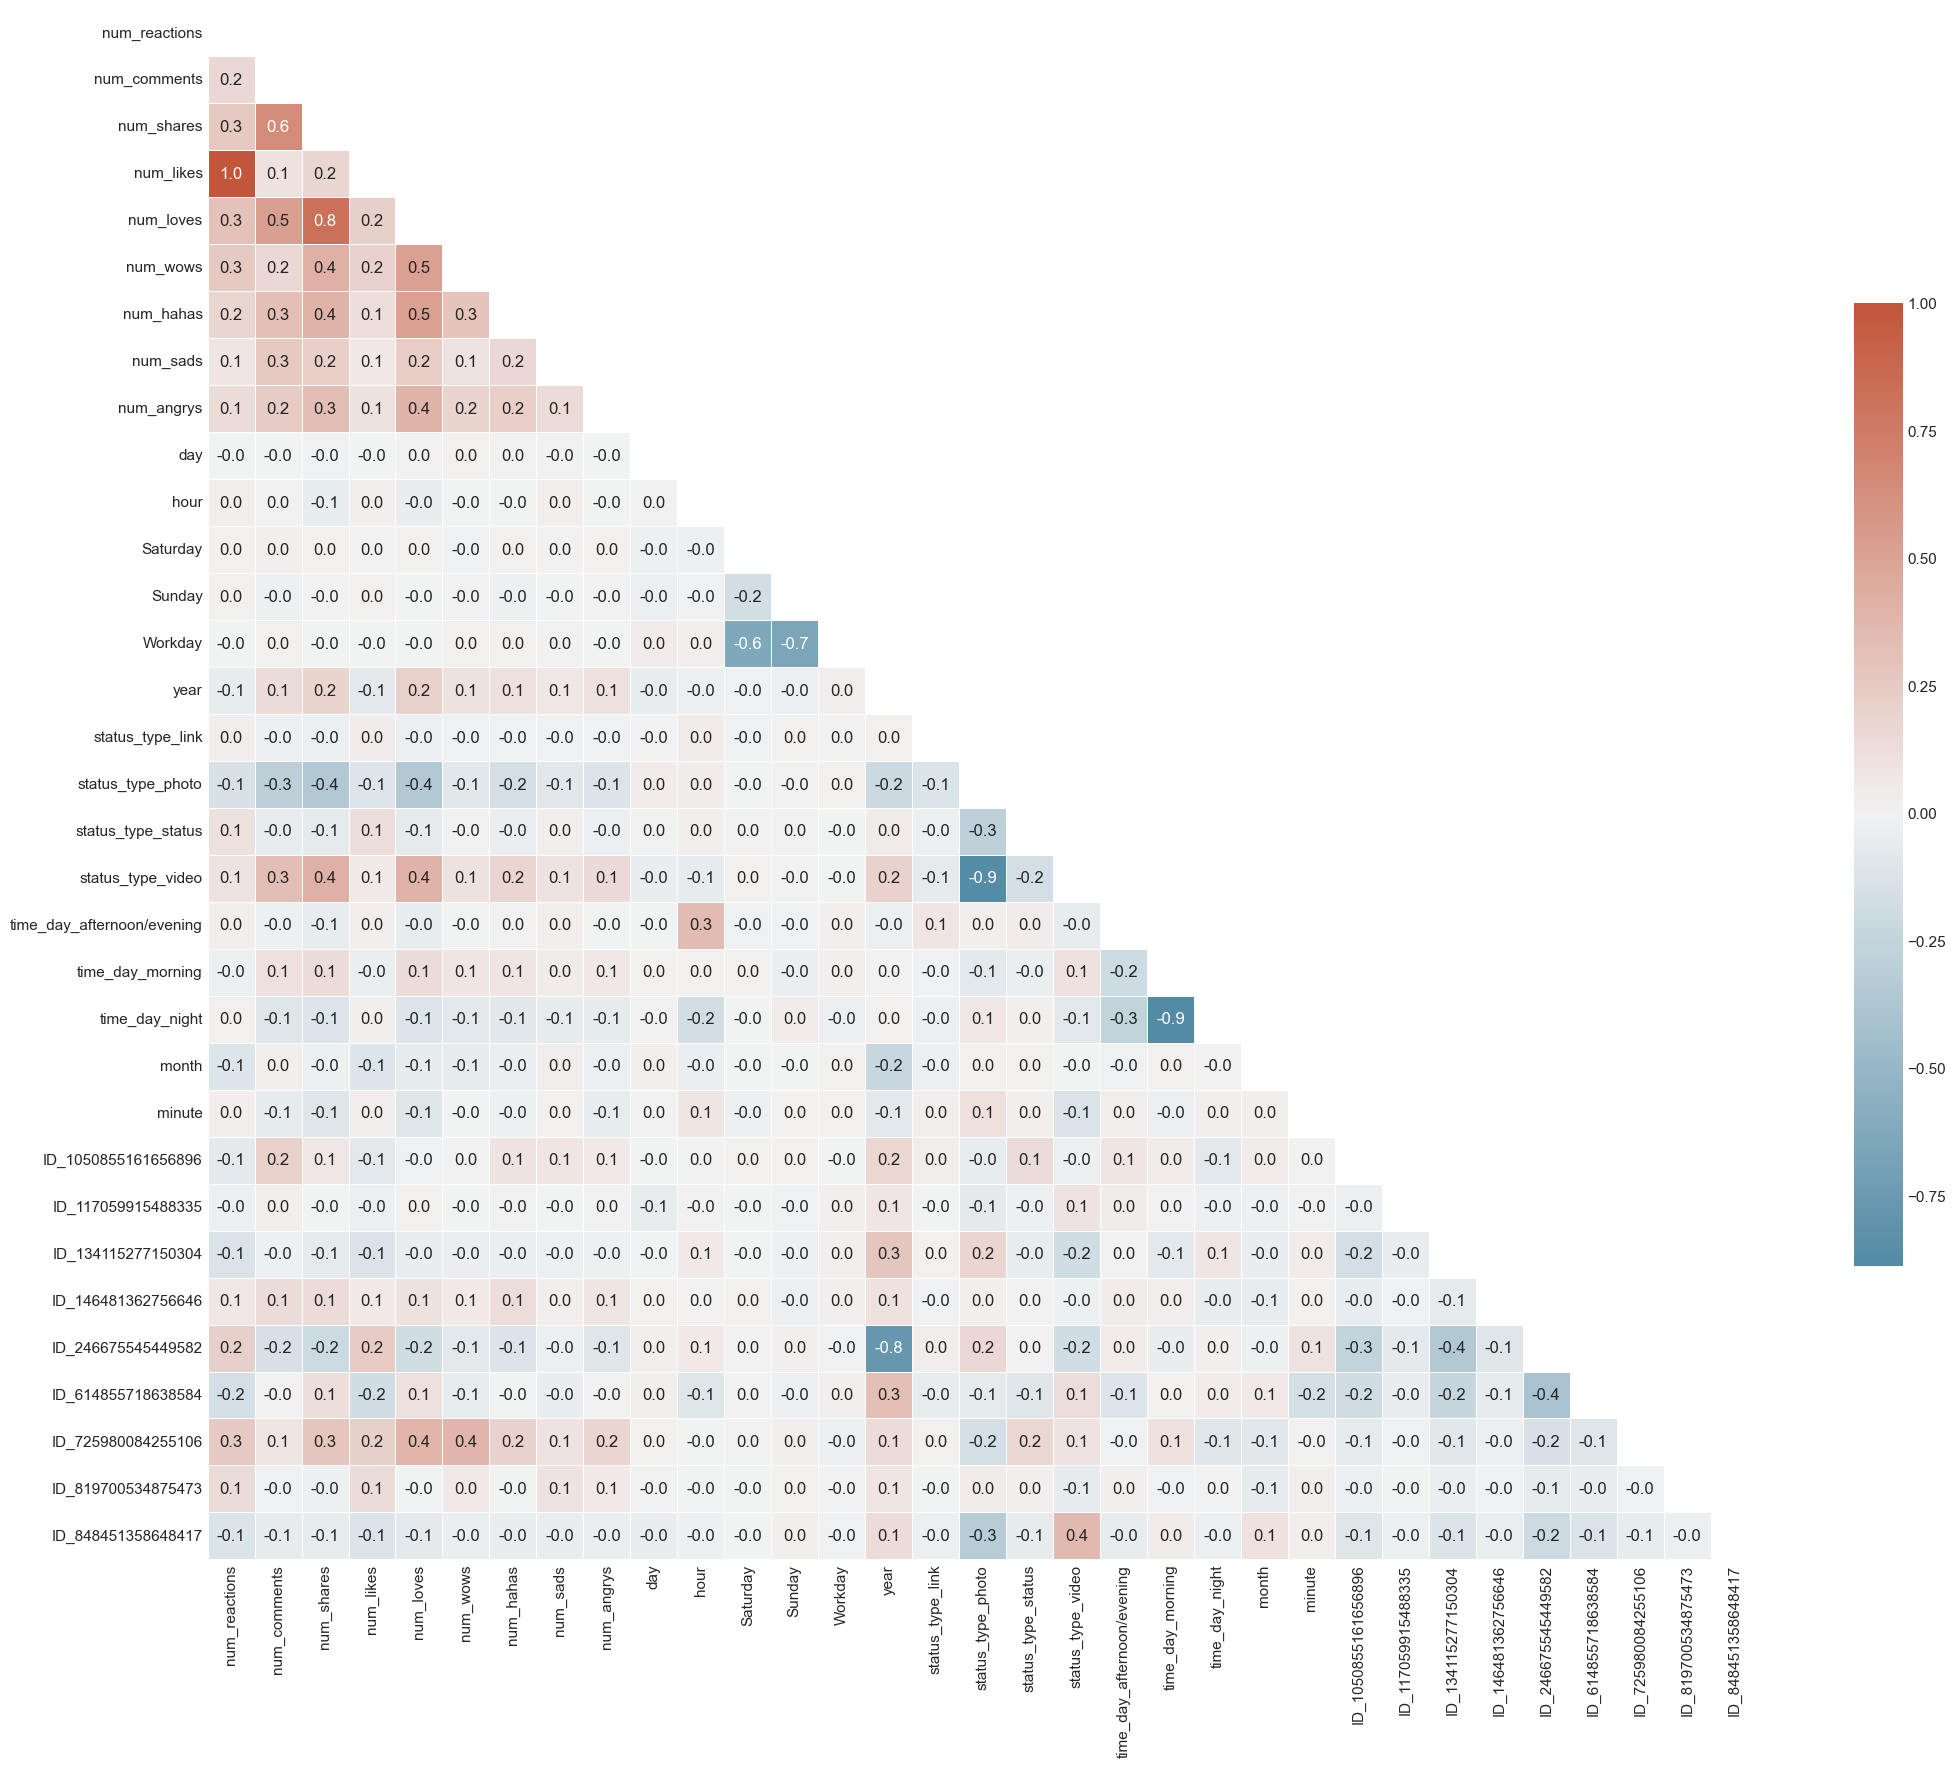

In [773]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(25, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f')

plt.show()


### **Observaciones sobre el gráfico de correlaciones** :

Por motivo de claridad dada la cantidad de datos, ha sido redondeado a una sola decimal. Estamos obteniendo información que puede ser valiosa, sea para la observación de los **hábitos y comportamiento** de la audiencia o clientes potenciales, sea para el análisis de los usuarios comerciantes de las marcas de maquillaje, en el supuesto de que sean competidores por los mismos clientes. Destacan particularmente las variables de reacción y sus relaciones entre sí, pero también las de **estratégias de márketing digital** para generar contenido y así llamar la atención, como las fotos y video y algunas variables temporales.

**Variables tipos de reacción y medios visuales**:

   * Destacamos las variables de tipo **'likes' y 'reacciones', correlacionadas al casi 100%** (0,99), por lo que podemos decir que **donde hubo reacción alguna al contenido publicado, ellas fueron mayormente positivas** y se tradujeron en un 'like'. Dicho de otra manera, los clientes tienen un **alto nivel de 'engagement'** con esta persona o marca.   
   * En el heatmap podemos observar multicolinearidad clara entre les variables 'num_reactions' i 'num likes', al haber mucha correlación entre ellas.
   * En menor medida (0,2 a 0,3) pero importante para el comercio en redes, las 'reacciones' traen también un 'comentario', un 'love', un 'wow' o un 'share' (compartir el contenido con otra persona).
   * Relativamente pocas 'reacciones' vinculadas a las negativas, tipo 'angry' o 'sad'.
   * Las reacciones positivas están más vinculadas con un usuario que con los demás : el ID_725980084255106, aunque también un poco las negativas. 
   * Una variable que creo que es más importante de los que parece, es la de **compartir publicación o 'share'**, ya que ayuda a la captación de clientes nuevos y está muy **vinculada a 'love' (0,8) y simultáneamente a  'wow', 'haha'** y hasta un poco a 'angry' ; corr. postivamente a medios visuales como **'vídeo' (0,4)** y al contrario, corr. neg. a 'fotos' (-0,4). Esto explica que si a la gente le das contenido sorprendente o fuerte emocionalmente, sentirán la necesidad de reaccionar a ello y a compartirlo con otros. Sin entrar en detalles, podría tratarse de **estratégias de comunicacón** muy estudiadas, o de "márketing guerilla", por ejemplo.
   * Estatus por medio de **'videos'** se correlaciona bastante con 'share', 'love','comments' y un poco con 'haha', lo que lo hace es medio más eficaz para generar impacto ; destacar que su **corr. a 'fotos' es muy divergente (-0,9)**, pudiendo ser porque cada suario se acostumbra a usar una herramienta / estratégia y luego sigue principalmente con ella. O bien, que al ver el potente efecto o el interés de su audiencia por los vídeos (no sabemos si son ortos, o si al contrario, son largos tutoriales como para enseñar a maquillarse, etc), un comerciante ya no cree necesario comunicarse a través de fotos.
   
**Variables temporales**:

   * Como era de esperar, 'Workday' es muy divergente respeto a 'Saturday' y 'Sunday'. 
   * 'Saturday' y 'Sunday' no divergen mucho porque ambas son fin de semana y de noche se pueden solapar las interacciones de ambos días si los clientes están conectados tarde la noche del sábado, como efectivamente vimos que hacen al principio del estudio.
   * Los intentos de ver qué días nominales eran mas activos no han dado frutos, porque al haber separado las fechas en trozos, tenemos los días y meses sueltos, lo que los desvincula de fechas señaladas. 
   * 'Day_time_night' y 'Day_time_morning' divergen por razones obvias, pero también porque la audiencia nocturna seguramente no es la misma que por la mañana y hasta tendrán características distntas.
    
**En cuanto a usuarios (creadores de contenido / vendedores)**: 

   * **ID_725980084255106** parece ser el **más viral** porporcionalmente hablando, pues es el **más vinculado a contenidos con 'reacciones' en general (0,3)** y también a las **positivas**, como al número de **'loves' (0,4), 'wows' (0,4), 'shares' (0,3), de 'likes' (0,2), 'haha'** (carcajadas), aunque podría ser a la vez **más polémico, porque recibe algo de feedback negativo como 'angry' (0,2) y 'sads' (0,1)**. En este aspecto no sabemos con certeza que contenido veían los usuarios (sabemos los medios pero no qué mensajes contenían), por lo que podríamos pensar que los feedback negativos tipo carita triste pueden darse tambén al ver imágenes por ejemplo, en el contexto de la belleza, de pieles estropeadas o quemadas por el sol, de mujeres y niñas forzadas a trabajar o en situaciones vulnerables, etc. Es decir que si bien puede haberse enfadado algún usuario, hay temas que cuando se publican, se prestan a ese tipo de reacción negativa. 
   * El mismo usuario **ID_725980084255106** está más relacionado con los estatus de tipo 'status', que se puede entender que son cambios de **estatus en texto, o texto con emojis** y su relación con **'fotos' es divergente**. 
   * Curiosamente no está muy vinculado con los demás usuarios, siendo los números entre 0 y -0,2, sugeriendo que no haya coincidido con ellos **ni fueran compitiendo por los mismos clientes en los mismos momentos**.
   * En cuanto a fecha, obtiene una valor de corr. de 0,1 para 'year' puede significar que dentro de los límites temporales del estudio, la recogida de sus datos queda casi en medio, más bien alejado de 2012 pero tampoco muy cerca al 2018. 
   * Tiene una **relación temporal divergente** con dos de los usuarios vendedores (con **ID_246675545449582**, **ID_134115277150304**, **ID_6148555718638584** y ), lo cual quiere decir que al no coincidir no fueron verdaderos "competidores" en el mercado de FB Live de entonces.
    
   * Otro usuario interesante de observar es el **ID_246675545449582**, que está algo vinculado con reacciones tipo 'reactions' en general y de tipo 'likes', pero su **corr. con 'commments', 'shares' y 'loves' es negativa, indicando que de todos, es el que menos comentarios recibe y su contenio es el que menos han ha sido compartido por la audiencia**. Tampoco es divertido, dado que su relación con 'haha' es un poco negativa.
   * Utilizó fotos, pero su corr. con vídeos es negativa, siendo uno **de los dos que menos han publicado status con vídeos**.
   * Este vendedor tiene una corr. de **-0,8 con la variable 'year'**, lo que podría indcar que se situa **en un extremo del dataset en cuanto a tiempo**, posiblemente al principio de todo, lo que tendría senido dado que entonces no se utilizaban tantos videos (ni los vídeos cortos) como hoy y las opciones en cuanto a material gráfico y tipos de reacción de los clientes eran más escasas.
   
   * El usuario **más correlacionado con 'comentarios' es ID_10508555161656896**, pero podríamos especular que de media, no son comentarios positivos, dado que su **vinculación más alta es con las reacciones 'sad', 'angry' y haha'**, y está relacionado en la misma medida con 'year', estando en la parte media / media-alta del la escala temporal del estudio.
    
   * En usuario **ID_117059915488335 es el que menos corr. tiene con todas las variables** ; quizá no tiene una línea clara de actuación y que su contenido en cuanto a output y también a feedback, a medios visuales, es relativamente neutro. **No genera reacciones extremas**. Parecdo al tercero de la lista **ID_134115277150304**, en cambio, ese ultimo es más reciente, usa más fotos y menos vídeos.
   * El último de la lista, **848451358648417** tiene los valores de corr. muy neutrales, casi en 0, menos para es estatus de **'video', donde es el que más alta vinculación tiene y la más baja en 'fotos'**, seguramente porque genera una cantdad relativamente muy importante de vídeos, pero muy poca o nada de fotos. En cambio, **no está claro si el esfuerzo tuvo efectos**, dado que los valores de corr. con todas las demás variables como los tipos de reacción, son casi nulos, denotando un **bajo nivel de 'engagement'**. Podría ser muy neutral, o que sus interacciones no interesen especialmente, que sean pocas, que no provocan, o que formen una media dentro de los valores del dataset y que por ello no destaca. Además no parece estar vinculado o coincidir con los demás usuarios comerciantes.
 

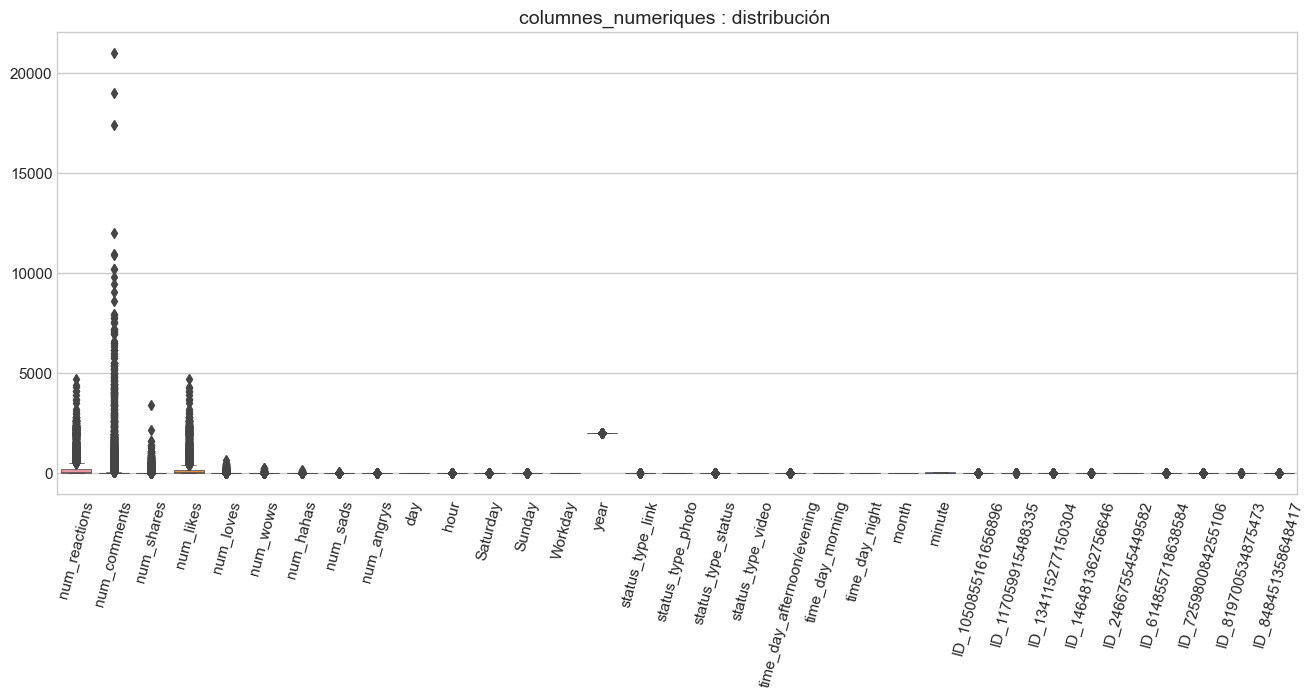

In [774]:
fig, ax = plt.subplots(figsize=(16, 6))
ax = sns.boxplot(data = df, linewidth= 0.5)
plt.title('columnes_numeriques : distribución ', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75) 
plt.show()

Vemos la columnas estrictamente numéricas, que son las que habrá que escalar más tarde

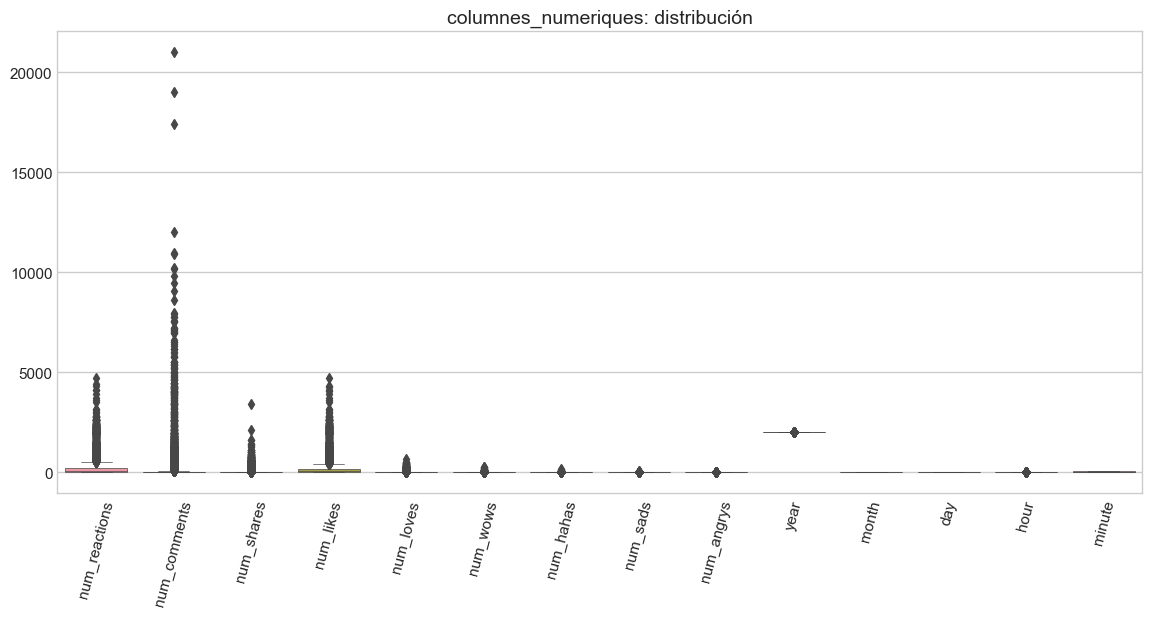

In [775]:
num_columns = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
                  'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'year', 'month',
                  'day', 'hour', 'minute']]

fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.boxplot(data=num_columns, linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75) 
plt.title('columnes_numeriques: distribución', fontsize=14)
plt.show()


### **Evaluación de distribuciones / Tests de normalidad**

Comprobamos mediante shapiro qué variables presentan distribución gaussinana

In [776]:
# Comprobamos mediante shapiro qué variables presentan distribución gaussinana

from scipy.stats import shapiro
import colorama
from colorama import Fore, Style

col = list(df.columns)

def distr_normal(df):
    normal = []
    for col in df.columns:
        p_valor = shapiro(df[col])[1]
        normal.append(p_valor > 0.05)
    return normal
resultado = distr_normal(df)

for resultado in resultado :
    if resultado is True : 
        print(Fore.GREEN, resultado, Style.RESET_ALL)
    else :
        print( Fore.RED, resultado, Style.RESET_ALL)

 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 
 False 


Shapiro nos está mostrando al gual que los gráficos que no hay ninguna vvarable con distrbución normal.

### **Busca de valores atípicos / outliers**

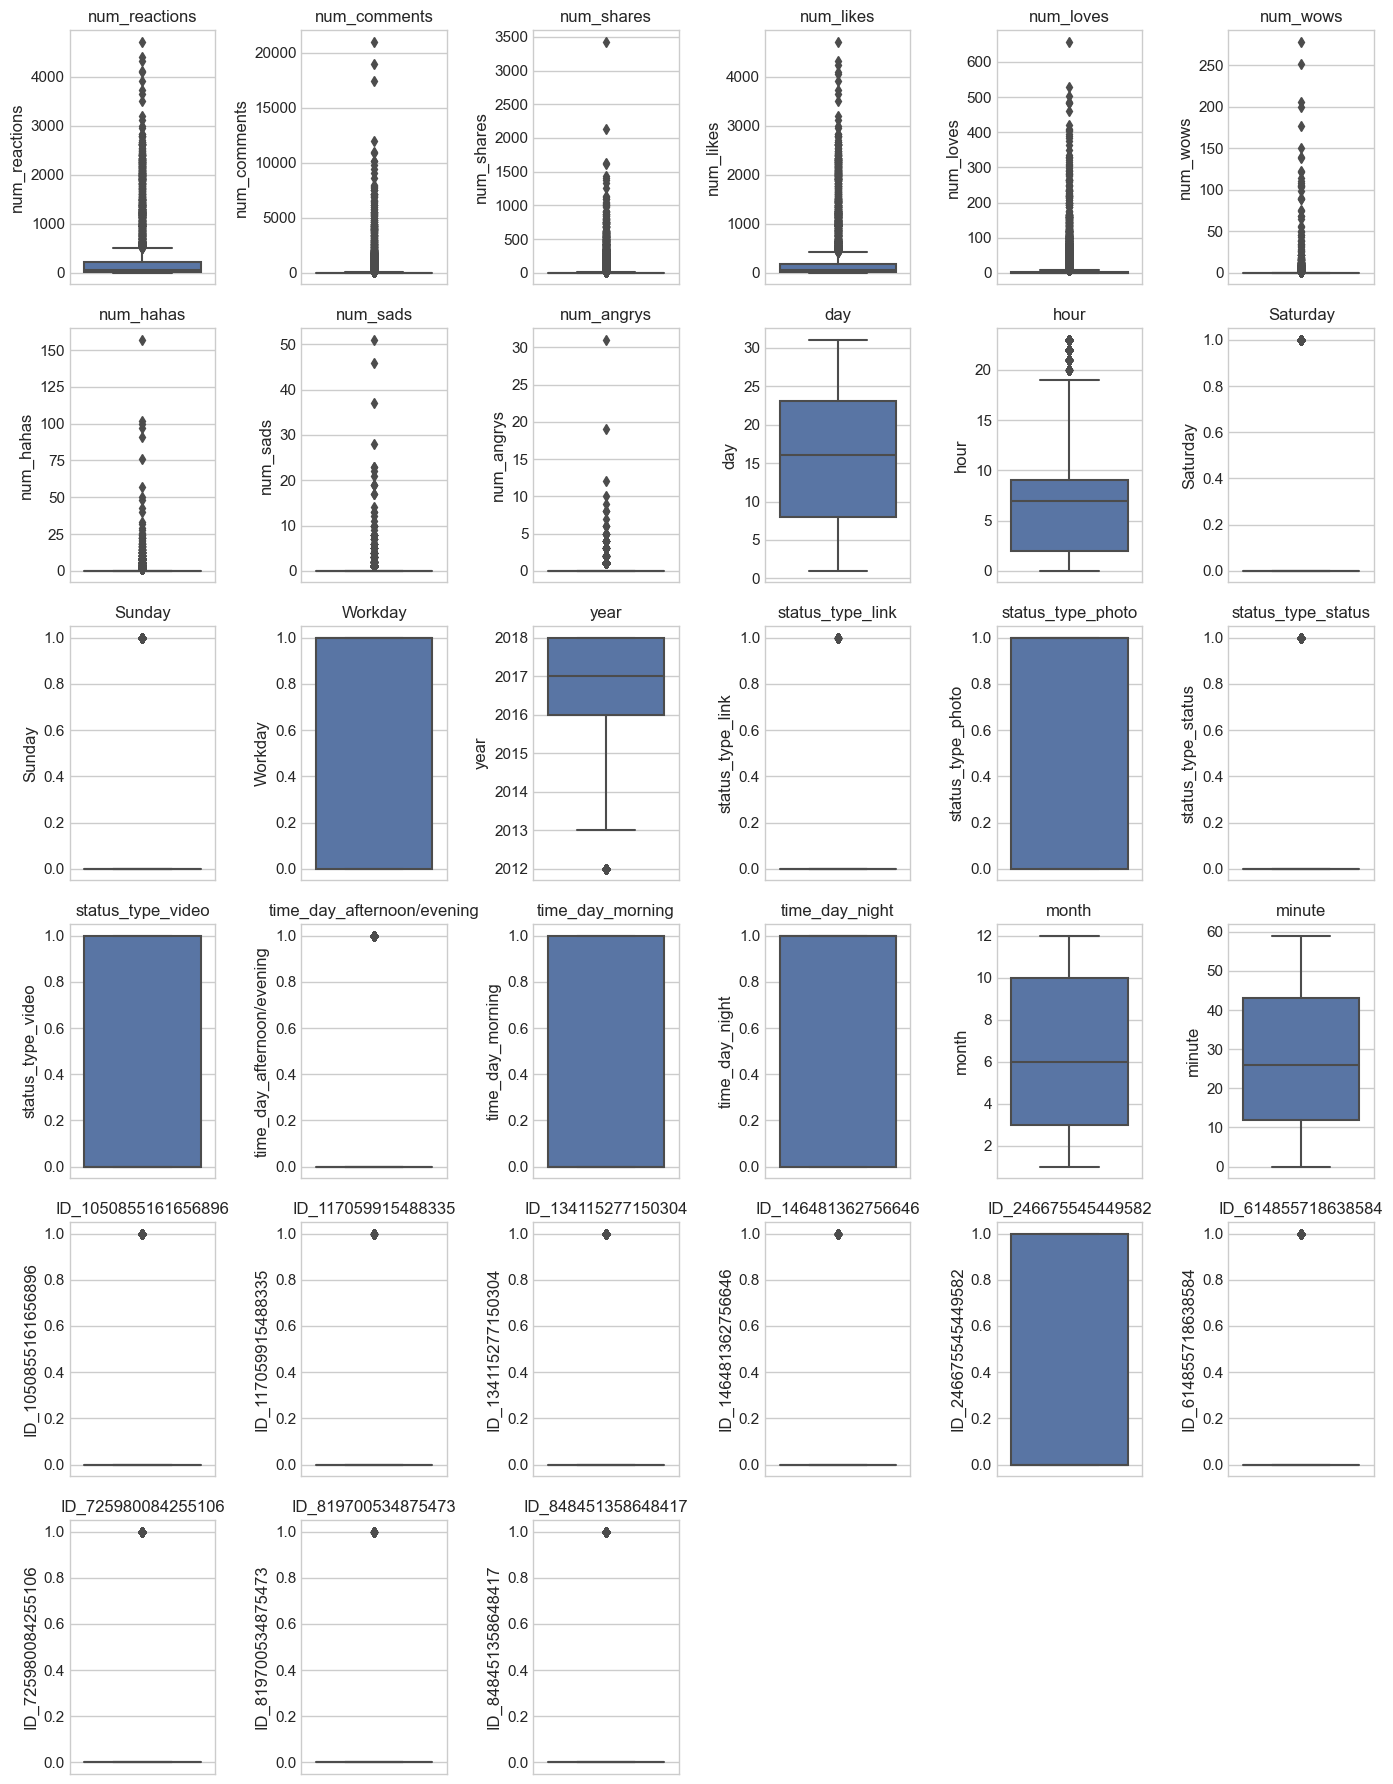

In [777]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionem només les columnes numèriques
columnes_numeriques = df.select_dtypes(include=['number']).columns

# Determinem el nombre de files i columnes per als subplots
n_cols = 6  # Increase the number of columns
n_rows = (len(columnes_numeriques) + n_cols - 1) // n_cols

# Creem els subplots amb mides ajustades
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 3 * n_rows))  # Adjust figsize for larger subplots

# Aplanem la matriu d'axis per iterar fàcilment
axs = axs.flatten()

# Creem un boxplot per a cada columna numèrica
for i, col in enumerate(columnes_numeriques):
    sns.boxplot(y=df[col], ax=axs[i], orient='v')  # Set orient='v' for vertical orientation
    axs[i].set_title(col)

# Amaguem els gràfics no utilitzats si n'hi ha
for i in range(len(columnes_numeriques), len(axs)):
    axs[i].set_visible(False)

# Ajustem el layout per evitar la superposició
plt.tight_layout()

# Mostrem el gràfic
plt.show()


In [778]:

# Calculate outliers for each column and count them
outliers_count = {}

for col in columnes_numeriques:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outliers_count[col] = len(outliers)

    
# Print the number of outliers for each variable
print("\nNumber of outliers for each variable:")
for col, count in outliers_count.items():
    if count == 0:
        print(f"\033[92m{col}: {count}\033[0m")  # Print in green
    else:
        print(f"\033[91m{col}: {count}\033[0m")  # Print in red
       


Number of outliers for each variable:
num_reactions: 689
num_comments: 1365
num_shares: 1382
num_likes: 754
num_loves: 1303
num_wows: 1702
num_hahas: 1117
num_sads: 598
num_angrys: 420
day: 0
hour: 1068
Saturday: 976
Sunday: 1050
Workday: 0
year: 589
status_type_link: 63
status_type_photo: 0
status_type_status: 359
status_type_video: 0
time_day_afternoon/evening: 408
time_day_morning: 0
time_day_night: 0
month: 0
minute: 0
ID_1050855161656896: 778
ID_117059915488335: 56
ID_134115277150304: 1212
ID_146481362756646: 125
ID_246675545449582: 0
ID_614855718638584: 1440
ID_725980084255106: 252
ID_819700534875473: 51
ID_848451358648417: 450


* Vemos que estas variables no tienen outliers : Workday, status_type_photo, status_type_video, time_day_morning, time_day_night, ID_246675545449582, month, day y minute.
* Las demás sí tienen, algunas hasta mil y más de 1700 outliers en el caso de num_wows.

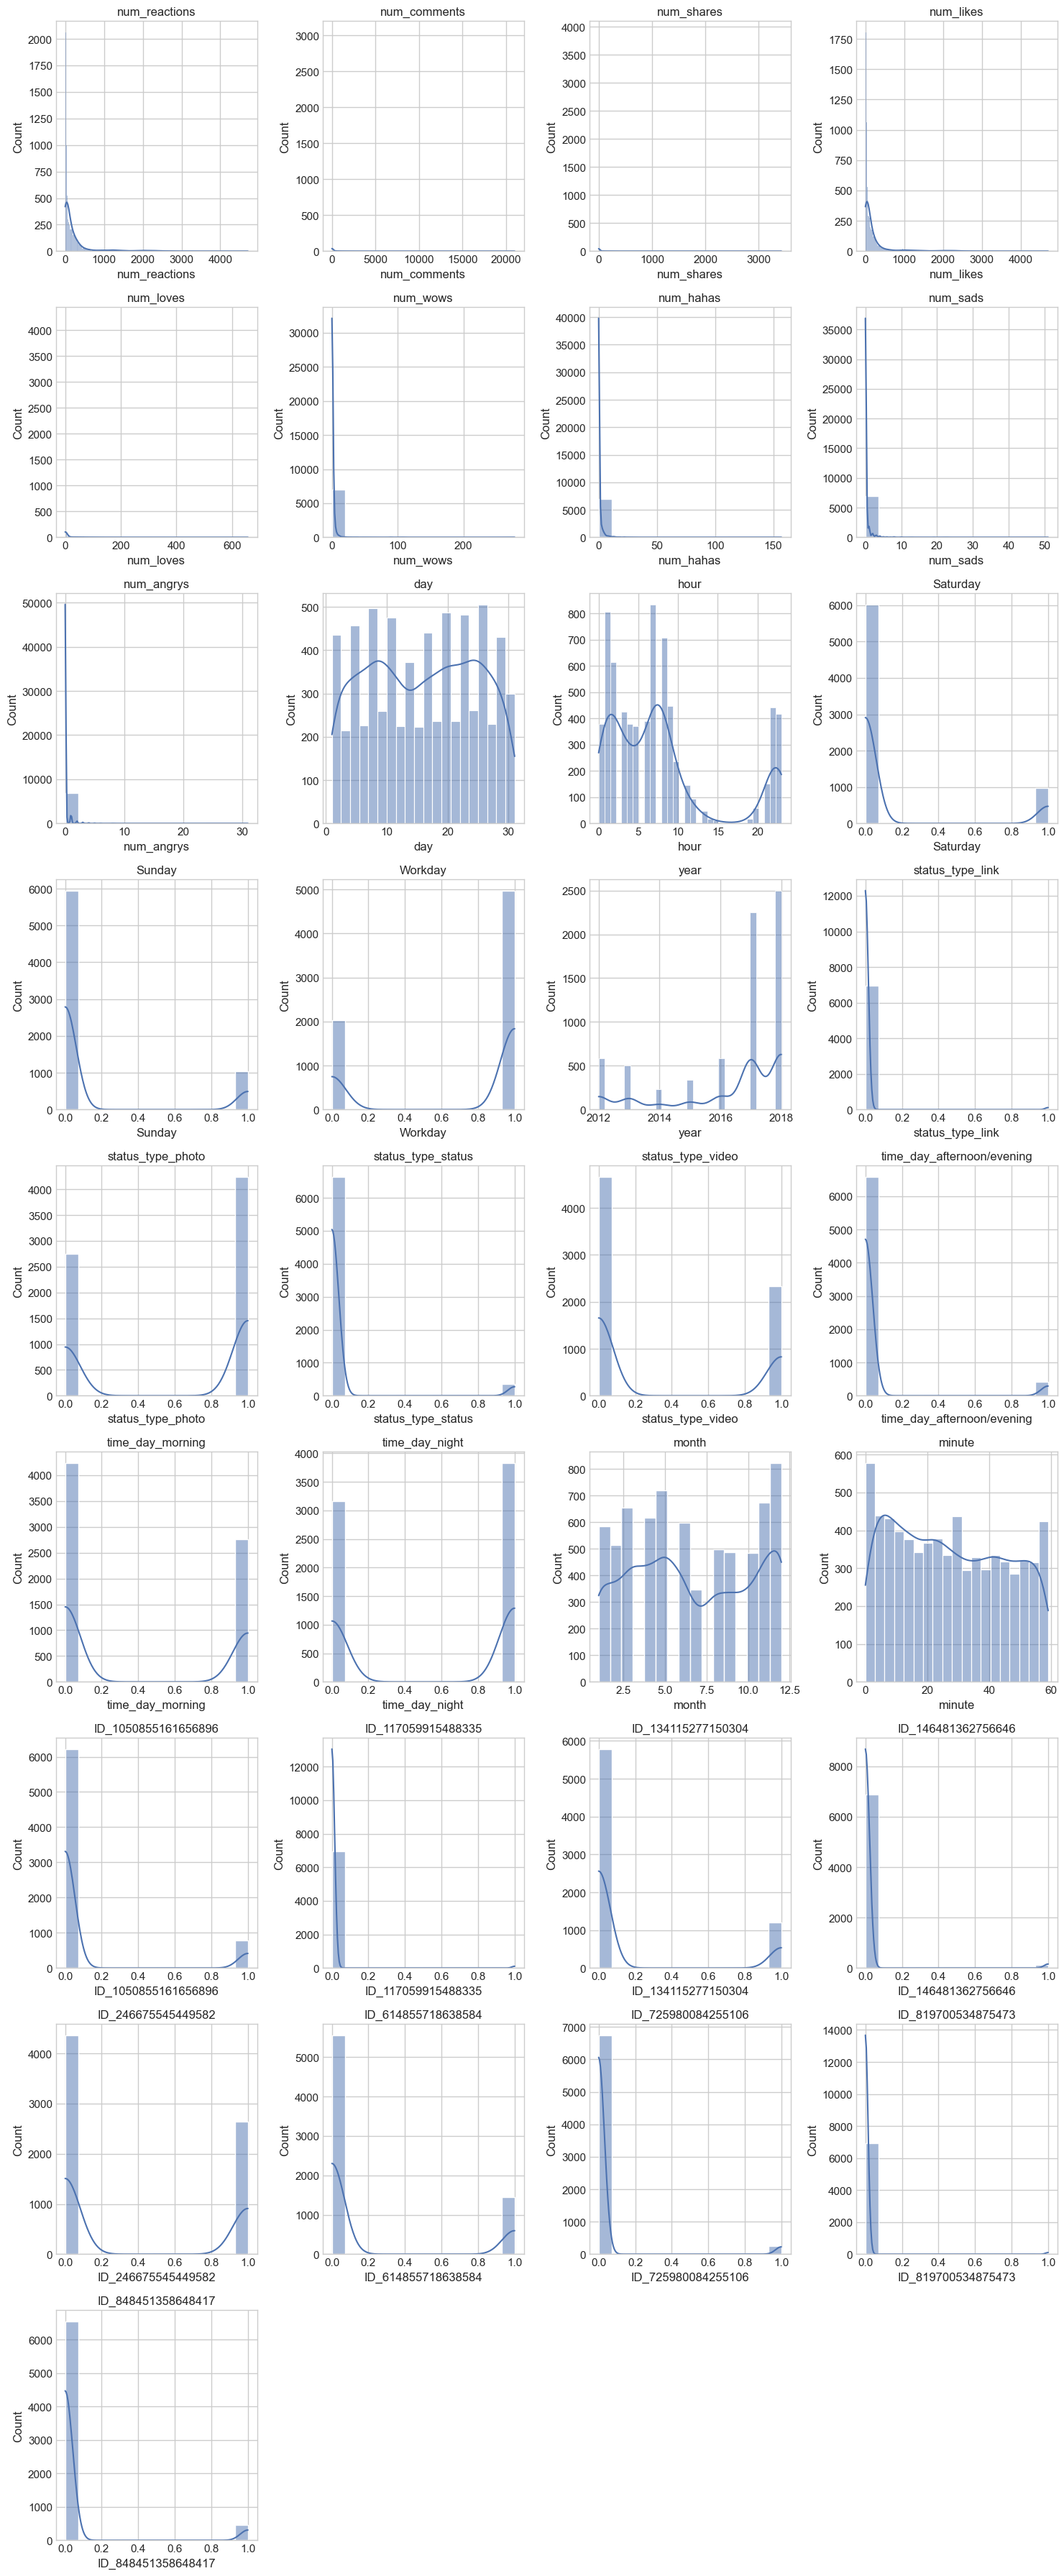

In [779]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Determine the number of rows and columns for subplots
n_cols = 4  # Increase the number of columns
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

# Create subplots with adjusted sizes
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))  # Adjust figsize for larger subplots

# Flatten the axis matrix for easy iteration
axs = axs.flatten()

# Create a histogram for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axs[i], kde=True)  # Plot histogram with kernel density estimation
    axs[i].set_title(col)

# Hide unused plots if any
for i in range(len(numerical_columns), len(axs)):
    axs[i].set_visible(False)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


* Los gráficos muestran que no hay ninguna variable con distrbución normal.
* Como hecho interesante, cuando observamos las varables de tiempo en la parte de abajo, entendemos mejor como se distribuyen las publicaciones e interacciones en el dataset:

        - en 2017 y 2018 se multiplican por más de 4 veces respecto al 2016
        - cuando más las hay es el otoño, invierno y primavera entre los meses de noviembre y mayo, no en pleno verano, quizás debido al calor y humedad de Taiilandia.
        - los días parecen tener una distribución ma´s o menos homogénea, con emfasis después de los prmeros días y antes de los últimos días de mes.
        - la distribución de las horas reitera lo que vimos al principio, que es que las interacciones se hacen de noche y de madriugada (pronto por la mañana)
        - la distribución de las minutos muestra que alrededor del cambio de hora (minutos antes y después) es cuando se interactúa más con las publicaciones 
       

#### **Resumen de las columnas** : 

Todas son numéricas de tipo float, pero algunas son realmente dummies con valores booleanos que representan categorías de zonas temporales o de tipos de reacciones y comunicaciones.

    Index: (['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
           'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'Saturday', 'Sunday',
           'Workday', 'status_type_link', 'status_type_photo',
           'status_type_status', 'status_type_video', 'time_day_afternoon/evening',
           'time_day_morning', 'time_day_night', 'ID_1050855161656896',
           'ID_117059915488335', 'ID_134115277150304', 'ID_146481362756646',
           'ID_246675545449582', 'ID_614855718638584', 'ID_725980084255106',
           'ID_819700534875473', 'ID_848451358648417', 'year', 'month', 'day',
           'hour', 'minute']

De las cuales...: 

    Estas variables son numéricas corrientes SIN outliers : se les aplicará un preprocesamiento con Min Max scaler
            'month', 'day', 'minute'.

    Estas variables son numéricas corrientes CON outliers : se les aplicará un preprocesamiento con Robust Scaler
            'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
           'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'year', 'hour'

    De las cuales las siguientes variables son binarias SIN ouliers, que NO hay que escalar. Observamos que son variables con muchos datos seguidos, lo que podría explicar que no tengan outliers:

        'Workday', 'status_type_photo', 'status_type_video', 'time_day_morning', 'time_day_night', 'ID_246675545449582'
       
    Las siguientes variables son binarias CON ouliers : que se pueden escalar o dejar así.

       'status_type_status', 'status_type_link','time_day_afternoon/evening', 
        'Saturday', 'Sunday', 'ID_1050855161656896',
       'ID_117059915488335', 'ID_134115277150304', 'ID_146481362756646', 'ID_725980084255106',
       'ID_819700534875473', 'ID_848451358648417'
       
    Podemos afirmar que las columnnas estríctamente numéricas son solamente éstas :

        'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 
        'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'year', 'month', 'day', 'hour', 'minute'

Es crucial manejar adecuadamente las variables numéricas y ficticias durante el escalado. Robust Scaler es útil para variables numéricas con valores atípicos. Sin embargo, para las ficticias binarias, el escalado puede no ser necesario ya que no tienen una escala natural. Si decides escalarlas, MinMaxScaler o StandardScaler son opciones adecuadas. Considera la naturaleza de tus datos antes de aplicar el escalado a las variables ficticias.

### **ESCALADO**:

Para abordar los siguientes ejercicios, utilizaremos el algoritmo K-means para agrupar los registros en el conjunto de datos. Dado que tenemos una combinación de variables numéricas y binarias, aplicaremos diferentes técnicas de preprocesamiento según el tipo de variable:

* **Variables numéricas sin outliers**: Utilizaremos **MinMaxScaler** para escalar estas variables.
* **Variables numéricas con outliers**: Utilizaremos **RobustScaler** para escalar estas variables.
* **Variables binarias sin outliers**: **No requieren escalado** ya que son binarias y representan categorías.
* **Variables binarias con outliers**: Podemos decidir si **escalarlas o no**, dependiendo de la naturaleza de los datos y el enfoque de modelado.

Escalamos las variables numéricas sin outliers utilizando MinMaxScaler y las variables numéricas con outliers utilizando RobustScaler. 
Luego aplicaremos el algoritmo K-means y PCA utilizando las variables escaladas y evaluaremos el rendimiento del clustering.
 
En un principio consideraremos todas las variables de dataset para ver qué pasa pero si hace falta, se rectificará, quitando variables para trabajar con menos dimensionalidad.

In [780]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import pandas as pd

# Creamos una copia del DataFrame para evitar modificar el original
df_processed = df.copy()

# Escalado de variables numéricas sin outliers usando MinMaxScaler
numeric_columns_minmax = ['month', 'day', 'minute']
scaler_minmax = MinMaxScaler()
df_processed[numeric_columns_minmax] = scaler_minmax.fit_transform(df_processed[numeric_columns_minmax])

# Escalado de variables numéricas con outliers usando RobustScaler
numeric_columns_robust = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
                          'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'year', 'hour']
scaler_robust = RobustScaler()
df_processed[numeric_columns_robust] = scaler_robust.fit_transform(df_processed[numeric_columns_robust])

df_processed.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,...,minute,ID_1050855161656896,ID_117059915488335,ID_134115277150304,ID_146481362756646,ID_246675545449582,ID_614855718638584,ID_725980084255106,ID_819700534875473,ID_848451358648417
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0.700000,...,0.000000,0,0,0,0,1,0,0,0,0
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0.666667,...,0.762712,0,0,0,0,1,0,0,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0.666667,...,0.288136,0,0,0,0,1,0,0,0,0
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0.666667,...,0.491525,0,0,0,0,1,0,0,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0.566667,...,0.372881,0,0,0,0,1,0,0,0,0


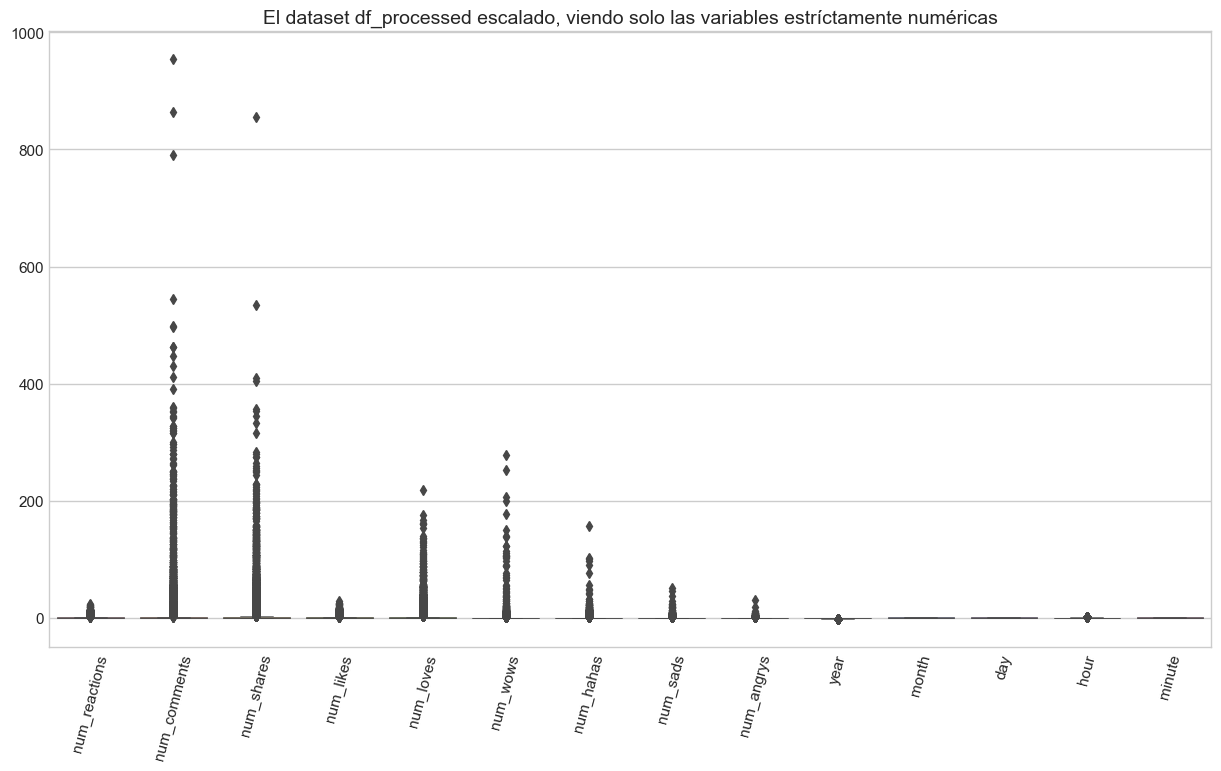

In [781]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.boxplot(data = df_processed[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
                  'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'year', 'month',
                  'day', 'hour', 'minute']], linewidth= 0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75) 
plt.title('El dataset df_processed escalado, viendo solo las variables estríctamente numéricas', fontsize=14)
plt.show()

* Observamos que las variables se han escalado, puesto que antes, algunas como num_comments se pasaban de los 20 000. 
* Sin embargo, los valores de las variables que muestran reacciones, siguen muy sesgados y dispersos

## **Exercici 1: Clasificar los diferentes registros utilizando el algoritmo K-means**

Varios métodos son válidos para calcular el **algoritmo K-means** y encontrar el número óptimo de clusters. La diferencia radica en el enfoque utilizado para determinar el número adecuado de clusters.

**WCSS (Within-Cluster Sum of Squares)**: En este enfoque, se calcula la suma de los cuadrados de las distancias de cada punto al centroide de su cluster correspondiente. Se prueba un rango de valores para el número de clusters y se selecciona aquel valor donde la disminución en WCSS comienza a disminuir significativamente (se produce un codo en el gráfico de la curva WCSS vs. número de clusters).

**Silhouette Coefficient**: Este método calcula la cohesión y la separación de los clusters para determinar qué tan bien están separados. Un valor de coeficiente de silhouette cercano a 1 indica una buena separación entre los clusters. Se prueba un rango de valores para el número de clusters y se selecciona aquel valor que maximiza el coeficiente de silhouette promedio sobre todos los clusters.

* Le pasamos el conjunto de datos escalado 'df_processed', con numéricas y booleans incluidas a ver como se comporta. 
* Luego veremos si quitamos algunas variables para disminuir el tamaño.

Valor de WCSS para k=2: 10027095.86832271
Silhouette coefficients para k=2: 0.8853714287807128 

Valor de WCSS para k=3: 6988957.191347623
Silhouette coefficients para k=3: 0.8383762670013402 

Valor de WCSS para k=4: 5533836.271135641
Silhouette coefficients para k=4: 0.8124180710128246 

Valor de WCSS para k=5: 4387030.243782711
Silhouette coefficients para k=5: 0.8185708672002341 

Valor de WCSS para k=6: 3659940.5363405785
Silhouette coefficients para k=6: 0.8126576595822413 

Valor de WCSS para k=7: 3008888.556921824
Silhouette coefficients para k=7: 0.8127290297105586 

Valor de WCSS para k=8: 2622722.7478284203
Silhouette coefficients para k=8: 0.7994551569624816 

Valor de WCSS para k=9: 2372309.2135463273
Silhouette coefficients para k=9: 0.8024257604082419 

Valor de WCSS para k=10: 2190874.297948455
Silhouette coefficients para k=10: 0.7879934031222525 



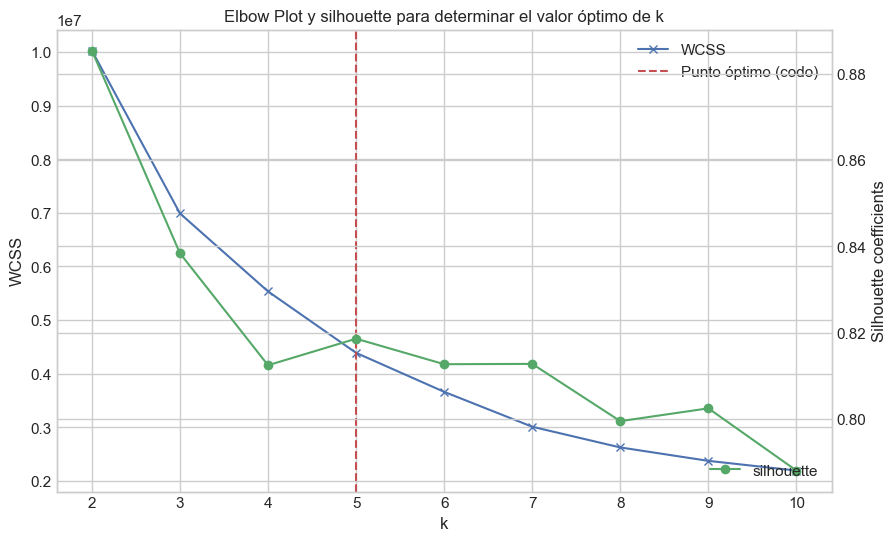

In [782]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Creamos listas para almacenar los valores de WCSS y las puntuaciones de la silhouette
wcss = []
silhouette_coefficients = []

# Decidimos el rango de k para probar
range_k = range(2, 11)

# Iteramos sobre el rango de valores de K
for k in range_k:
    # Instanciamos el modelo KMeans con el número deseado de clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    
    # Ajustamos el modelo a los datos
    kmeans.fit(df_processed)
    
    # Guardamos el resultado del ajuste para posibles usos posteriores
    cluster_labels = kmeans.labels_
    
    # Calculamos la suma de los cuadrados intra-cluster (WCSS) y la agregamos a la lista
    wcss_value = kmeans.inertia_
    wcss.append(wcss_value)
    print(f"Valor de WCSS para k={k}: {wcss_value}")
    
    # Calculamos la puntuación de la silhouette y la agregamos a la lista
    silhouette_score_value = silhouette_score(df_processed, cluster_labels)
    silhouette_coefficients.append(silhouette_score_value)
    print(f"Silhouette coefficients para k={k}: {silhouette_score_value}", '\n')

# Resto del código para crear Elbow Plot y mostrar las puntuaciones de la silhouette...


# Creamos una instancia de KneeLocator para encontrar el punto óptimo (codo)
knee = KneeLocator(range(2, 11), wcss, curve='convex', direction='decreasing')

# Encontramos el punto óptimo (codo) utilizando el método elbow
optimal_k = knee.elbow

# Graficamos el Elbow Plot con el punto óptimo destacado
plt.figure(figsize=(10, 6))
plt.plot(range_k, wcss, 'bx-', label='WCSS')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Plot y silhouette para determinar el valor óptimo de k')
plt.xticks(range(2, 11))
plt.grid(True)
plt.axvline(x=optimal_k, linestyle='--', color='r', label='Punto óptimo (codo)')
plt.legend(loc='upper right')

# Graficamos las puntuaciones de la silhouette
plt.twinx()
plt.plot(range_k, silhouette_coefficients, 'go-', label='silhouette')
plt.ylabel('Silhouette coefficients')
plt.legend(loc='lower right')

plt.show()


El **valor de inercia o WCSS en el clustering K-means** representa la suma de las distancias al cuadrado de las muestras a su centro de clúster más cercano. Mide qué tan compactos son los clústeres. Un valor de inercia bajo indica que los clústeres están más apretados alrededor de sus centroides, lo que sugiere un mejor ajuste de los datos a los clústeres.

En este caso, el **valor de inercia significa que la suma total de las distancias al cuadrado de las muestras a sus centros de clúster más cercanos** es aproximadamente 2,190,874. Este valor proporciona una **indicación de la dispersión de los puntos de datos alrededor de los centroides del clúster en grande**. Generalmente, se prefieren valores más bajos ya que indican clústeres más ajustados y un mejor ajuste de los datos a los clústeres. Sin embargo, la interpretación del valor de inercia depende del conjunto de datos específico y del problema en cuestión. A menudo se compara en relación con otros modelos o se utiliza junto con otras métricas para la evaluación.

* Veamos los datos para el número de clústers de hasta **k=5** como sugiere el gráfico de Elbow y Silhouette, ambos coincidiendo en que el punto óptimo está en utilizar **5 clústers** y nos lo está marcando porque es donde ambos valores de referenca se encuentran más cercanos

* Sin embargo, notamos que en **k=3** también se podría hacer porque los valores **WCSS y Silhouette coefficients son casi igual de coincidentes pero más altos** y por lo tanto, darían mejor **precisión en las predicciones**
    * para k=3 -> WCSS: 6 992 987 y Silhouette: 0.838
    * para k=5 -> WCSS : 4 387 030 y Silhouette: 0.819
    
    
* Por lo tanto, por cuestiones de precisión sería mejor tener 3 clústers, pero le haremos caso al diagrama y se hará con 5.


In [783]:
# Creamos una instancia del modelo KMeans con el número deseado de clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustamos el modelo a los datos
kmeans.fit(df_processed)

# Obtenemos las etiquetas de cluster asignadas a cada registro
cluster_labels = kmeans.labels_

### **Veamos lo que contiene cada uno de los 5 clústers generados por k-means**

In [784]:
# Agregar las etiquetas de cluster al DataFrame original
df_processed['cluster_label'] = cluster_labels

# Agrupar los datos por las etiquetas de cluster y mostrar el contenido de cada grupo
cluster_groups = df_processed.groupby('cluster_label')


In [785]:
df_processed.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,day,...,ID_1050855161656896,ID_117059915488335,ID_134115277150304,ID_146481362756646,ID_246675545449582,ID_614855718638584,ID_725980084255106,ID_819700534875473,ID_848451358648417,cluster_label
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0.700000,...,0,0,0,0,1,0,0,0,0,4
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0.666667,...,0,0,0,0,1,0,0,0,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0.666667,...,0,0,0,0,1,0,0,0,0,0
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0.666667,...,0,0,0,0,1,0,0,0,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0.566667,...,0,0,0,0,1,0,0,0,0,0


**Veamos cuántas observaciones hay en cada clúster :**

In [786]:
# Agregar las etiquetas de cluster al DataFrame original
df_processed['cluster_label'] = cluster_labels

# Contar el número de registros en cada cluster
cluster_counts = df_processed['cluster_label'].value_counts()

# Mostrar el número de registros en cada cluster
print("Número de registros en cada cluster:")
print(cluster_counts)


Número de registros en cada cluster:
0    6163
4     605
1     113
2      85
3      33
Name: cluster_label, dtype: int64


* Vemos que el **clúster 0 es el principal**, **seguido del Cluster 4**, retieniendo aproximadamente el **90% de la información**, seguido de los Cluster 1, del Cluster 2 y finalmente, del Cluster 3.
* Esto no quiere decir que sea un 90% uniforme, sino que puede haber variables que esén mucho en un cluster y poco en éste
* Ahora analizamos el detalle de su contenido

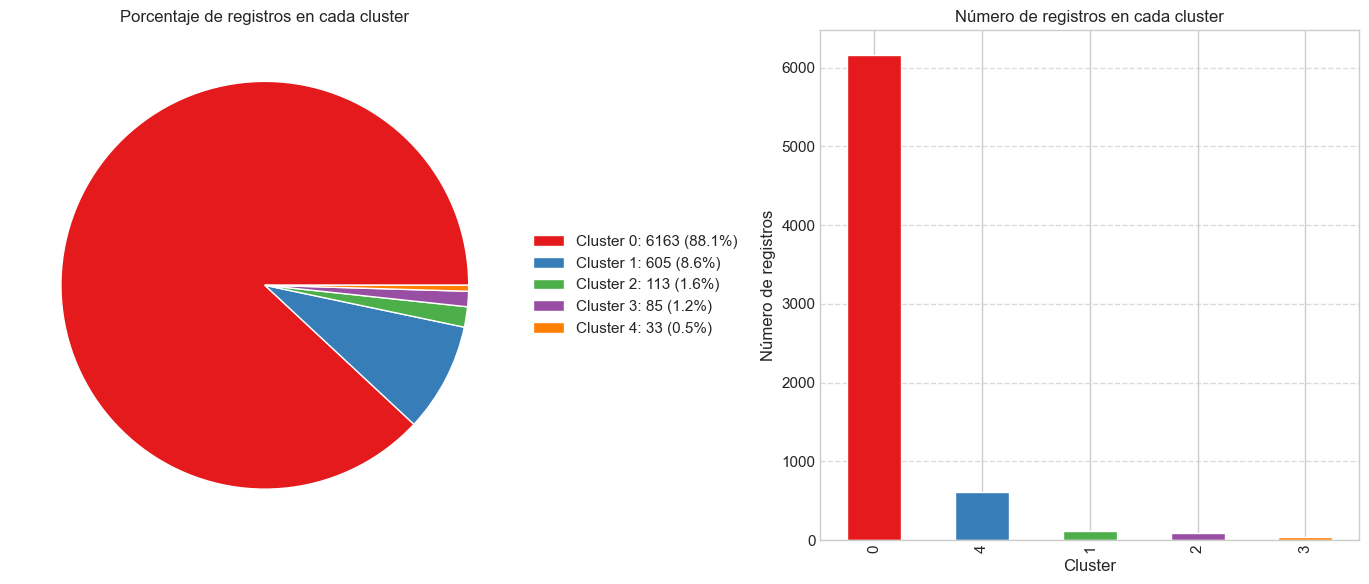

In [787]:
# Agregar las etiquetas de cluster al DataFrame original
df_processed['cluster_label'] = cluster_labels

# Contar el número de registros en cada cluster
cluster_counts = df_processed['cluster_label'].value_counts()

# Calcular porcentaje de registros en cada cluster
percentages = cluster_counts / cluster_counts.sum() * 100

# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
patches, texts = axs[0].pie(cluster_counts, labels=None, colors=sns.color_palette('Set1'))
axs[0].set_title('Porcentaje de registros en cada cluster')

# Construir la leyenda con los valores numéricos y los porcentajes
legend_labels = [f'Cluster {idx}: {value} ({percent:.1f}%)' for idx, (value, percent) in enumerate(zip(cluster_counts, percentages))]

# Add legend outside the plot
axs[0].legend(patches, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Bar chart
cluster_counts.plot(kind='bar', ax=axs[1], color=sns.color_palette('Set1'))
axs[1].set_title('Número de registros en cada cluster')
axs[1].set_xlabel('Cluster')
axs[1].set_ylabel('Número de registros')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

plt.show()


Observamos como nuevamente, el **Cluster 0 almacena casi el 90% de los registros, el Cluster 1 menos del 10% y los tres otros, menos de 4% entrre los tres**.

### **Organzación detallada de los 5 clústers aglomerados por k-means**

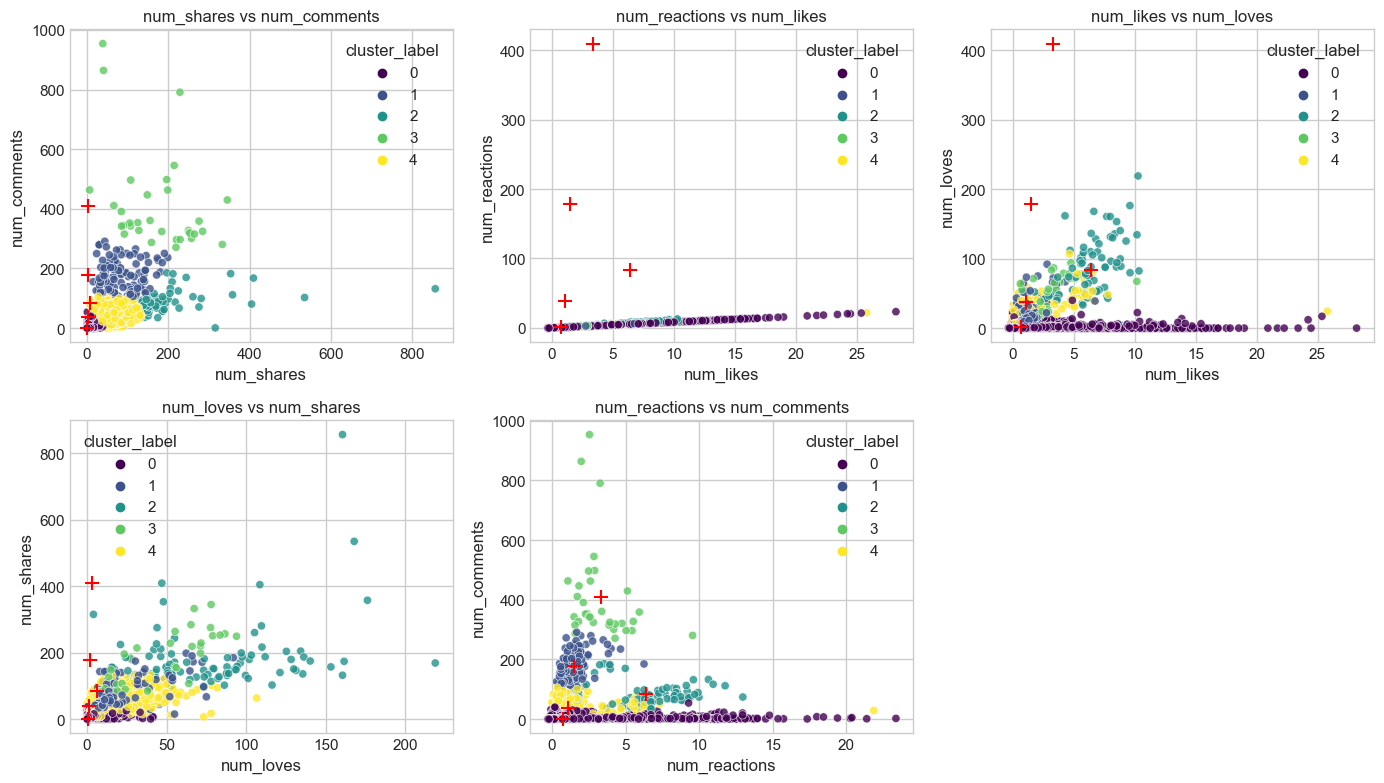

In [788]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create scatter plots
def create_scatterplot(x, y, data, hue, palette, centroids):
    ax = sns.scatterplot(x=x, y=y, data=data, hue=hue, palette=palette, alpha = 0.8)
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='+', c='red', s=100, label='Centroids')
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Define color palette
palette = 'viridis'

# Tamaño de la figura
plt.figure(figsize=(14, 8))

# Subgráfico 1
plt.subplot(2, 3, 1)
create_scatterplot('num_shares', 'num_comments', df_processed, 'cluster_label', palette, centroids)
plt.title('num_shares vs num_comments')

# Subgráfico 2
plt.subplot(2, 3, 2)
create_scatterplot('num_likes', 'num_reactions', df_processed, 'cluster_label', palette, centroids)
plt.title('num_reactions vs num_likes')

# Subgráfico 3
plt.subplot(2, 3, 3)
create_scatterplot('num_likes', 'num_loves', df_processed, 'cluster_label', palette, centroids)
plt.title('num_likes vs num_loves')

# Subgráfico 4 (el cuarto gráfico que deseas agregar)
plt.subplot(2, 3, 4)
create_scatterplot('num_loves', 'num_shares', df_processed, 'cluster_label', palette, centroids)
plt.title('num_loves vs num_shares')

plt.subplot(2, 3, 5)
create_scatterplot('num_reactions', 'num_comments', df_processed, 'cluster_label', palette, centroids)
plt.title('num_reactions vs num_comments')

plt.tight_layout()  # Ajusta automáticamente los subgráficos para evitar superposiciones
plt.show()


* En el **primer gráfico** tenemos una vista de los **comentarios y los shares** y es donde mejor podemos ver los **5 clústers bien definidos**. además, los valores tanto en x como en y son muy parecidos, lo que indica que **la gente cuando comparte una publicación, la suele también comentar, y esto es dedicarle más tiempo** que un simple clic de 'like' o poner un emoticono. Esto indica que para captar más clientes gracias a su audiencia, tienen que **generar contenio lo bastante interesante como para que el público tenga ganas de comentar y compartir** 
* Debajo, se observa una tendencia bastante clara entre las **publicacones más queridas y el hecho de compartirlas** con otros, lo que además ayuda al comerciante o marca a **obtener visibilidad y más mercado**.

* Es interesant ver hasta qué punto **los 'likes' se separaron de los 'loves'** y han sido aglomerados en clústers que se acercan poco o nada, pudiendo coiincidir un poco en el Cluster 1 (gráfco tercero), mientras que los 'loves' siguen la línea de tendencia y se ubican en clusters variados más entre el 2 y el 4, muy alejada de 'likes' (princpalmente Cluster 0). 

* La **influencia** de las variables **'num_reactions'** y de **'num_likes'** es muy grande, tanto que acaban determinando gran parte de la clusterización, pero también vemos que son muy altamente relacionadas entre ellas, siguiendo una línea de tendencia casi perfecta. Puede ser que por diversidad de fechas, o por asuntos técnicos, muchas 'reacciones' podrían ser o traducirse como 'likes', de allí la semejanza.
* Donde hay gran número de 'num_reactions' sin especificar y de 'num_likes', k-means crea el **Cluster 0**, muy marcado por éstas, que también se ven en menor medida en Cluster 1. 
* Por contra, los clústers donde hay pocas de éstas dos variables son más cercanos entre sí y se pueden ver en dimensiones menos lineales.

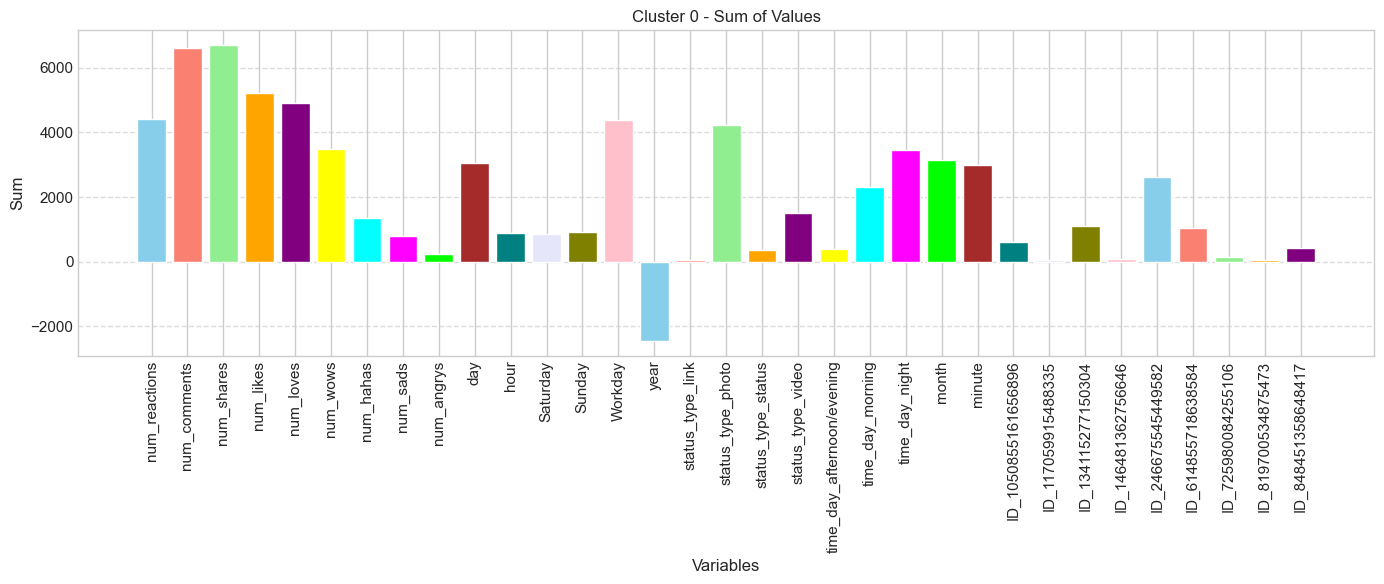

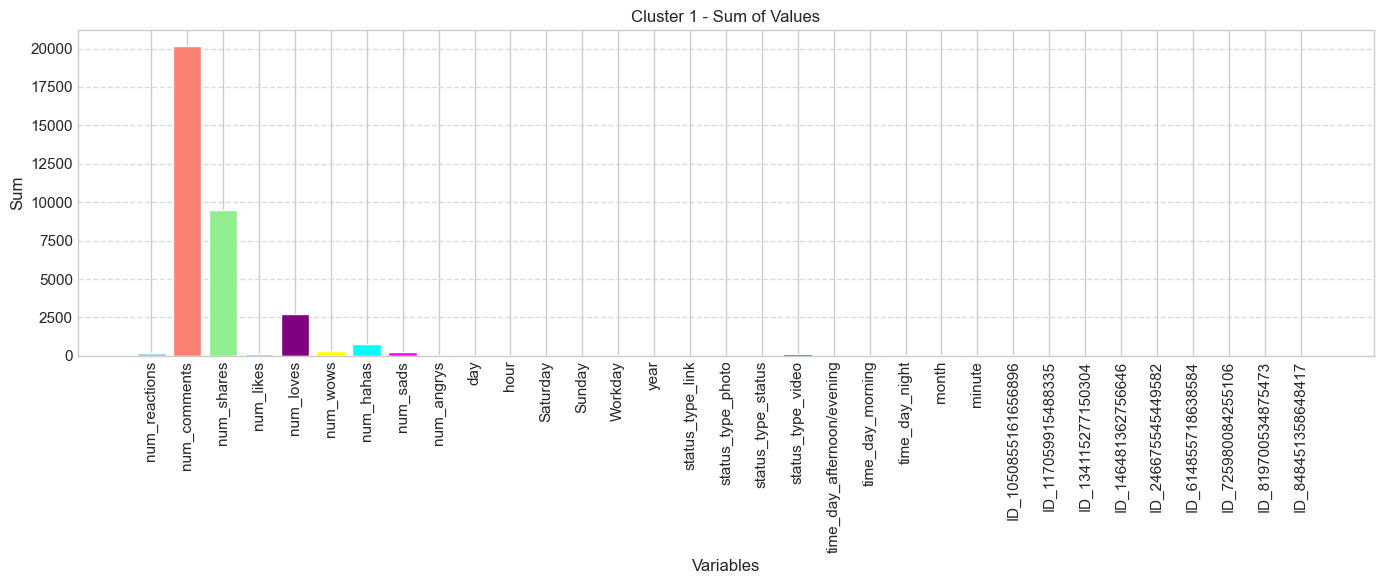

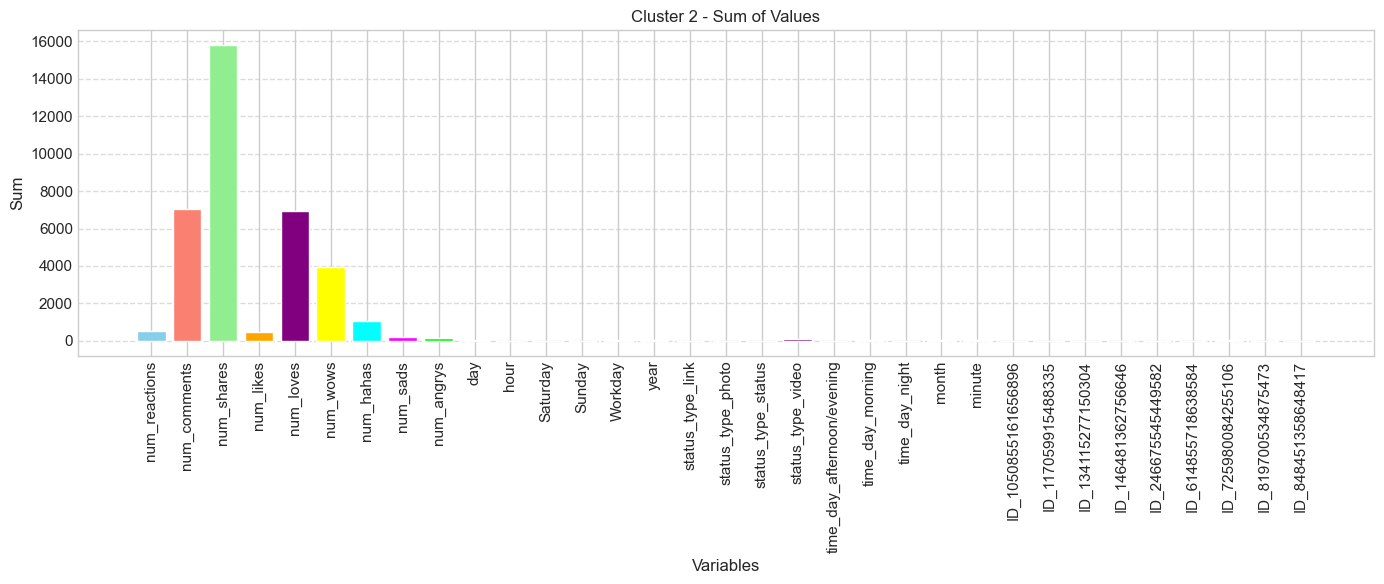

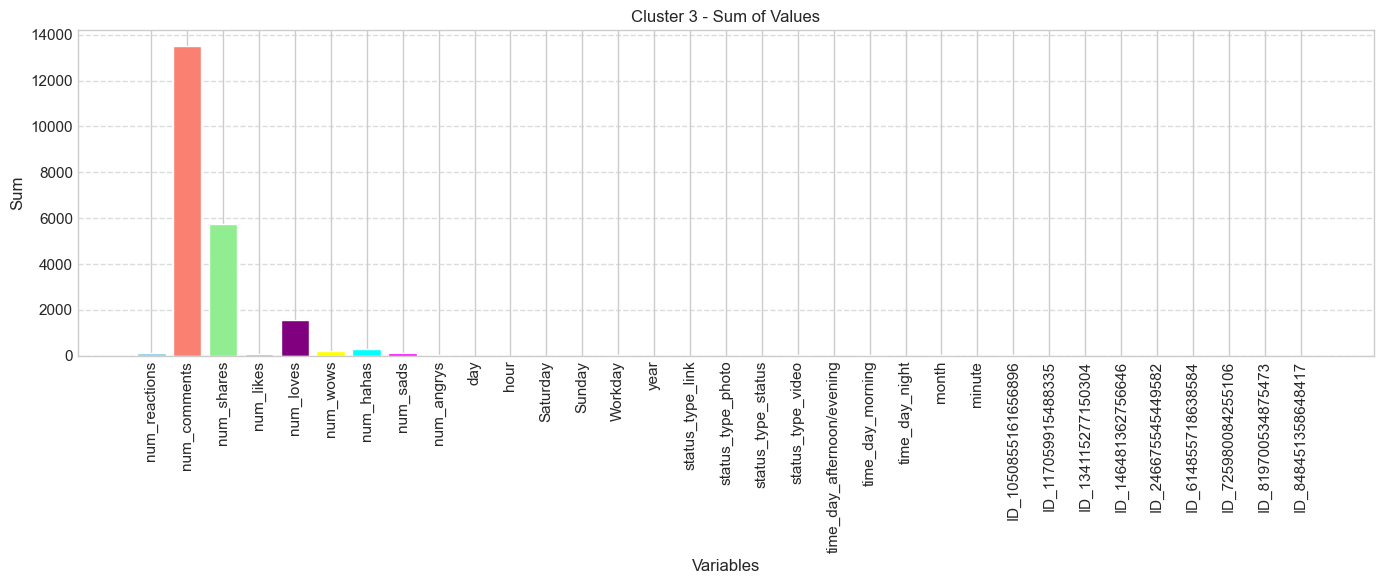

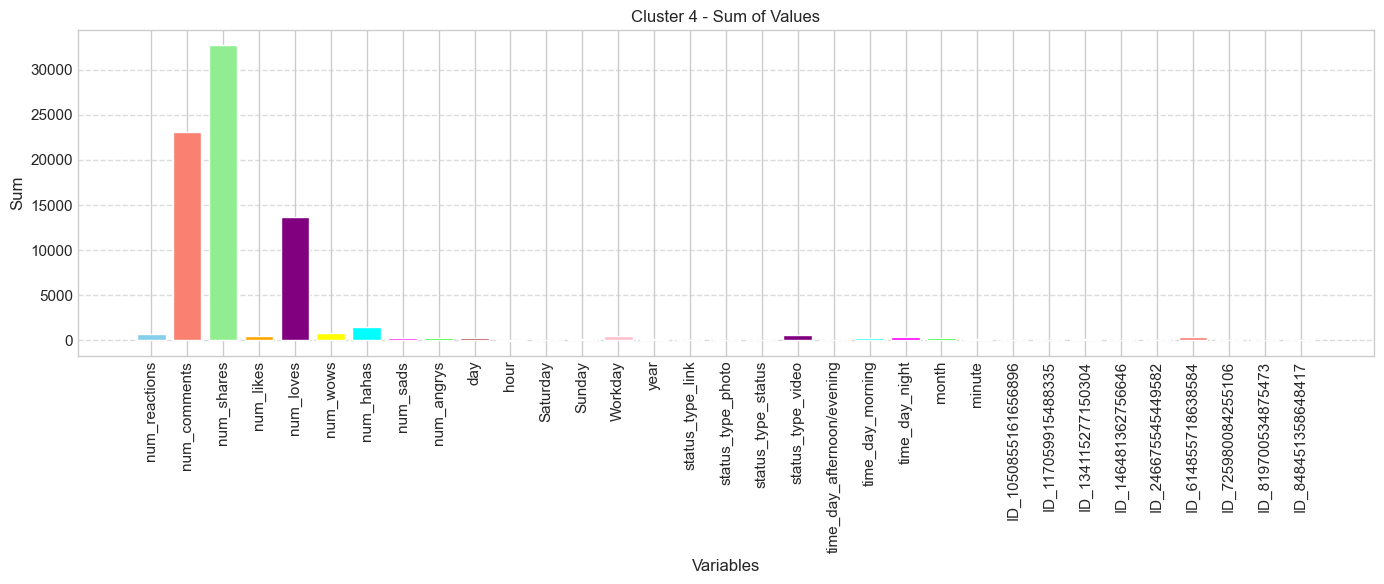

In [789]:
import matplotlib.pyplot as plt

# Filter the DataFrame by cluster_label and sum the values for each cluster
cluster_sum = df_processed.groupby('cluster_label').sum().astype(int)

# Transpose the DataFrame for easier plotting
cluster_sum = cluster_sum.T

# Define colors for each variable
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'brown', 'teal', 'lavender', 'olive', 'pink']

# Create bar graphs for each cluster
for cluster in cluster_sum.columns:
    plt.figure(figsize=(14, 6))
    plt.bar(cluster_sum.index, cluster_sum[cluster], color=colors)
    plt.title(f'Cluster {cluster} - Sum of Values')
    plt.xlabel('Variables')
    plt.ylabel('Sum')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### **Observaciones sobre las gráficas de los 5 clústers resultantes tras entrenar el modelo k-means:**

* Los **'comentarios', 'shares' y 'loves' son las variables que marcan la diferenca entre los diferentes clústers** ; en mucha menor medida, también los **'wow', 'haha' y el estátus con 'vídeo'**
* Los datos de estas tablas recordamos que fueron escalados y por lo tanto, sus cantidades son mucho menores que en la realidad. 
* El **Clúster 0 es el que reúne variables de todas las columnas** ; aquí hay datos que en los demás clústers no existen o quedan inperceptibles. 
* Como curiosidad, 'year' aparece en negativo tras el escalado, quizás porque se parece más a una variable categórica que no a una numérica. Es una variable que no estaba casi nada correlacionada con las otras, por lo que se podría quitar y que no haga ruido. 
* Resalta nuevamente que las variables **'shares', 'comentarios' y 'loves'** parece que se atraen una a la otra y **están muy correlacionadas en el dataset original como en los clústers del dataset escalado**.
* Fuera del Clúster 0, los 'wow' y 'hahas' están ubicados en mayor medida junto a los 'likes', como si fueran reacciones más superficiales, mientras que los 'loves' y 'shares', vemos que se unen en los mismos clústers donde también hay muchos 'comments', que requieren más esfuerzo (escribir vs solo hacer un siimple clic), por lo que los indicadores de una mayor vinculación entre el contenido publicado por los vendedores y su mer.

**Los demás clusters almacenan sobretodo variables de reacción de los internautas / clientes en FB Live Tailandia y se reparten así los datos** :
* En el **Clúster 1** hay de todo, pero predominan los **'comentarios' (+20 000)**, aunque no es el clúster que mas tiene. Aquí vemos también unos **9000 'shares' y unos 2500 'loves'**, con algunas reacciones más, pero no incluye valores de las demás variables. Aquí destacan, a parte, los estatus tipo **'fotos'**, los datos temporales de **mañana** y, más aún, las interacciones relacionadas con la franza horaria de **noche** y el usuario **ID_246675545449582**. 
* El **Clúster 2** contiene el mayor número de **'shares' (casi 16 000)**, luego a la par los **'comments' (7000) y 'loves' (7000)** y bastante **'wows' (4000) y 1000 'hahas'**.
* El **Clúster 3** es el segundo que más **'comentarios' (+13 000)** contiene y tiene casi **6000 'shares'**, con aprox **1700 'loves'**
* El **Clúster 4** es donde han ido **más 'shares' (unos 35 000)**, donde hay **más 'comentarios' (23 000)** y **más 'loves' (13 000)**. También de entre los Clusters 1 y 4, el es donde hay más estatus publicados con **'video'**


### **PCA**

* La razón principal de usar PCA antes de K-means es reducir la dimensionalidad de los datos para mejorar la eficiencia del algoritmo K-means y potencialmente mejorar la calidad de los clústeres.
* El PCA se hace solo para variables numericas y a pesar que algunas columnas son binarias no quiere decir que son numéricas, no pudiendo pasarle las booleanas como 'status_type_photo', 'status_type_video', 'status_type_link', 'status_type_status' 

Le pasamos al PCA las columnas escaladas sin las booleans.

In [790]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleccionar las columnas que han sido escaladas
'''scaled_columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
                  'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'year', 'month',
                  'day', 'hour', 'minute']
'''

# Seleccionar las columnas que han sido escaladas
scaled_columns = numeric_columns_minmax + numeric_columns_robust 

# Aplicar PCA a las columnas escaladas
pca = PCA()
df_pca = pca.fit_transform(df_processed[scaled_columns])

# Obtener la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

**Basándonos en la varianza explicada por cada componente principal, podemos afirmar** :

* En número de **componentes principales disponibles es de 14** en total, siendo el mismo que el número de columnas que le hemos pasado para procesar
* El **primer componente principal explica aproximadamente el 78% de la varianza total** en los datos. Esto indica que este componente es muy importante y contiene una gran cantidad de información sobre la estructura de los datos.

* El **segundo componente principal explica alrededor del 17% de la varianza total**. Aunque es significativo, su contribución es considerablemente menor que la del primer componente principal.

* A partir del tercer componente principal, la varianza explicada por cada componente es baja, con valores cercanos a cero. Esto sugiere que estos componentes contienen poca información útil (aunque puede ser diferente por naturaleza a la otra). Puede ser redundante o poco relevante para describir la estructura de los datos, así que **utilizaremos solo los dos primeros componentes principales en nuestro análisis PCA**, para reter la mayor parte de la información y también reducir la dimensionalidad.

* Considerando los datos del cálculo, sólo estaríamos descartando 3 % de la información.


Varianza explicada por el componente principal 1: 0.78
Varianza explicada por el componente principal 2: 0.17
Varianza explicada por el componente principal 3: 0.02
Varianza explicada por el componente principal 4: 0.01
Varianza explicada por el componente principal 5: 0.00
Varianza explicada por el componente principal 6: 0.00
Varianza explicada por el componente principal 7: 0.00
Varianza explicada por el componente principal 8: 0.00
Varianza explicada por el componente principal 9: 0.00
Varianza explicada por el componente principal 10: 0.00
Varianza explicada por el componente principal 11: 0.00
Varianza explicada por el componente principal 12: 0.00
Varianza explicada por el componente principal 13: 0.00
Varianza explicada por el componente principal 14: 0.00


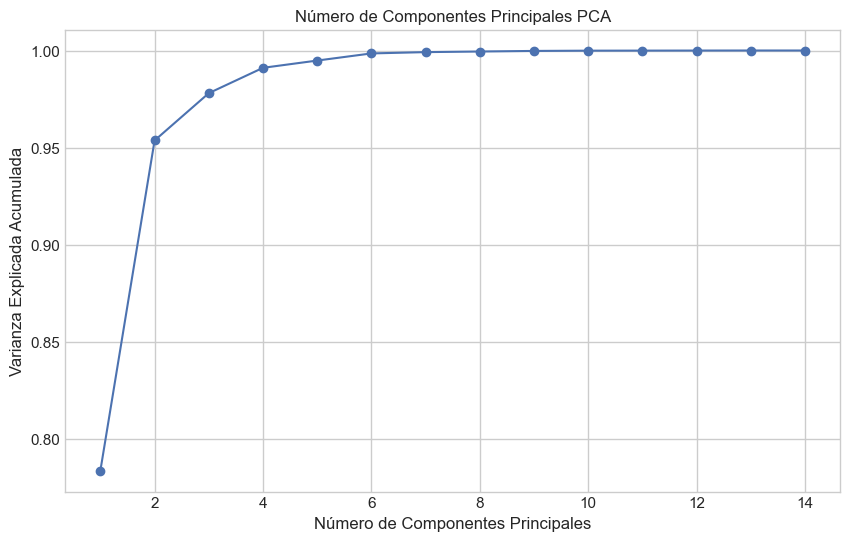

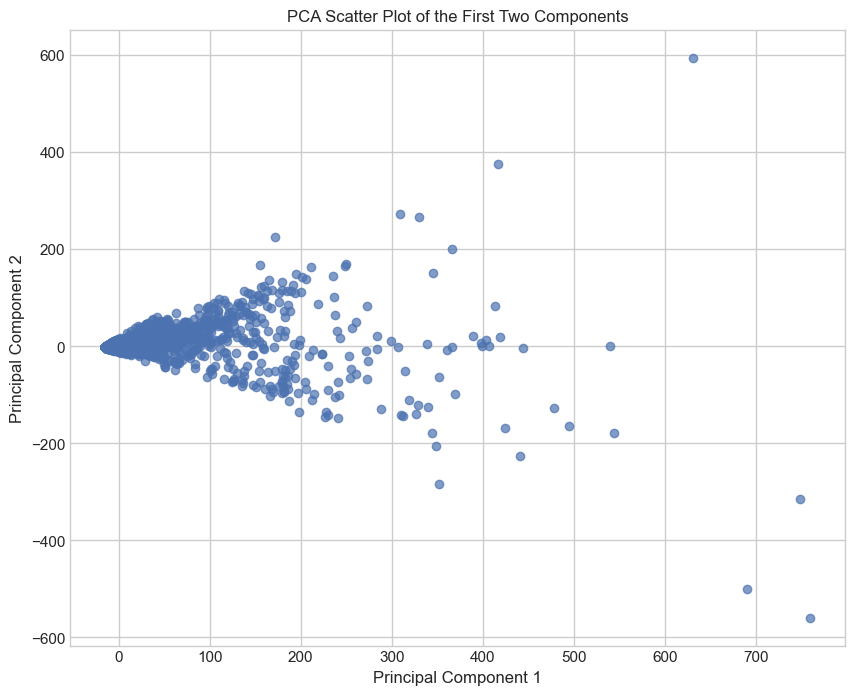

In [791]:
# Imprimir la varianza explicada por cada componente principal
for i, var_ratio in enumerate(explained_variance_ratio):
    print(f"Varianza explicada por el componente principal {i + 1}: {var_ratio:.2f}")

# Calcular la varianza explicada acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Trazar el gráfico del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Número de Componentes Principales PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Plot the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7)
plt.title('PCA Scatter Plot of the First Two Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

* Efectivamente, se redujo la dimensionalid, por lo que los 5 clústers se stúan más juntos y compactos en el espacio, con excepción de parte de los puntos del Clúster 0 y los del Cluster 4, donde vimos anteriormente en los grráficos de barras que contiene pocos tipos de variables, pero en mucha más cantidad que para los clústers 1, 2 y 3. 
* El Clúster 4 es donde han ido más 'shares' (unos 35 000), donde hay más 'comentarios' (23 000) y más 'loves' (13 000). En éste es donde se ubican las publicaciones con 'videos' y un 10 % de los registros. 
* El Cluster 0 es diferente por naturaleza y por tamaño de los otros porque incluye información de todas las variables, y por contener 6163 de las 6999 filas del conjunto de datos (+90%).


In [792]:
# Transform the data into the principal component space
pca_result = pca.transform(df_processed[scaled_columns])

# Extract only the first two principal components
pca1 = pca_result[:, 0]
pca2 = pca_result[:, 1]

# Create a DataFrame with the two principal components
df_pca = pd.DataFrame({'pca1': pca1, 'pca2': pca2})
df_pca

,pca1,pca2
0,48.144989,39.282941
1,-14.871880,-2.243211
2,3.374302,3.442291
3,-14.874602,-2.241792
4,-14.264812,-1.388950
...,...,...
6994,-14.880681,-2.250199
6995,-14.789026,-2.144672
6996,-14.824033,-2.179699
6997,-11.064553,1.579700


Los números en las columnas 'pca1' y 'pca2' representan las coordenadas de los datos transformados en el espacio de componentes principales (PCA). Cuando aplicas PCA a un conjunto de datos, este algoritmo encuentra una nueva representación de los datos en un espacio de menor dimensión, donde las nuevas dimensiones (llamadas componentes principales) son combinaciones lineales de las dimensiones originales. 

En la fila 0, los valores son 'pca1': 48.144989 y 'pca2': 39.282941. Estos números representan las coordenadas del primer punto de datos en el nuevo espacio de componentes principales. Por ejemplo, esto podría significar que el primer punto de datos está situado en la dirección positiva de la primera dimensión principal (pca1) en aproximadamente 48 unidades y en la dirección positiva de la segunda dimensión principal (pca2) en aproximadamente 39 unidades.

En la fila 9, los valores son 'pca1': -14.202497 y 'pca2': -2.029391. Estos números representan las coordenadas del 6999 punto de datos en el nuevo espacio de componentes principales. En este caso, los valores negativos indican que el punto de datos está situado en la dirección negativa de ambas dimensiones principales (pca1 y pca2), respectivamente.

## **Ejercicio 2: Clasificar los diferentes registros utilizando el algoritmo de clustering jerárquico**

En este ejercicio, emplearemos el algoritmo de clustering jerárquico para agrupar los registros en el conjunto de datos. Al igual que en el ejercicio anterior, hay que utilizar los datos preprocesados. Luego, utilizaremos el algoritmo de clustering jerárquico y evaluaremos los resultados.

**Para determinar el número óptimo de clústeres (n_clusters) en clustering jerárquico se puede hacer utilizando varios métodos. Aquí hay algunos enfoques comunes**:

    Inspección Visual del Dendrograma: visualizar el dendrograma y observar dónde hay un aumento significativo en la distancia (altura) entre fusiones de clústeres. 

    Clustering Aglomerativo con Diferentes n_clusters: Puedes realizar clustering jerárquico con diferentes valores de n_clusters y evaluar su rendimiento con métricas como el coeficiente de silhouette, el índice de Calinski-Harabasz o el índice de Davies-Bouldin. El valor de n_clusters que maximice estas métricas se puede considerar óptimo.

    Análisis de silhouette: Calcula el coeficiente de silhouette para diferentes valores de n_clusters y elige aquel que maximice el coeficiente de silhouette promedio. El coeficiente de silhouette mide qué tan similar es un objeto a su clúster en comparación con otros clústeres.


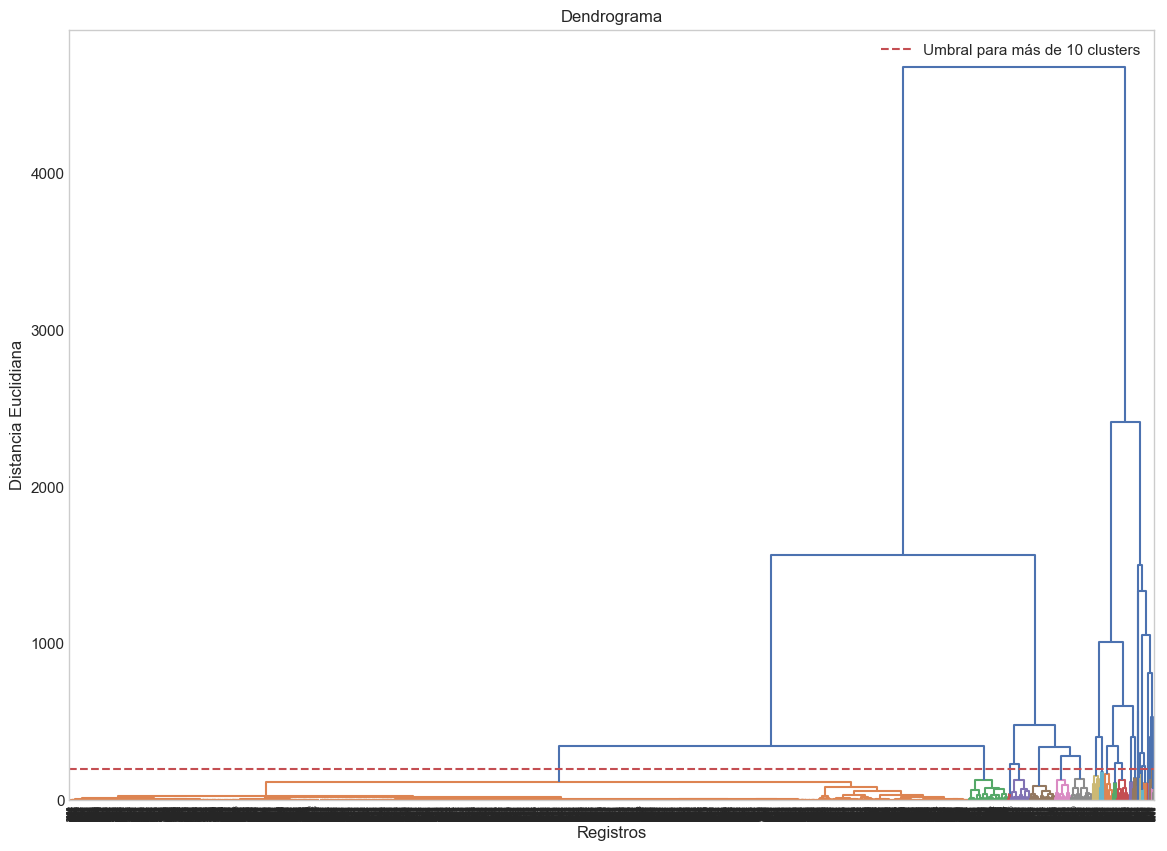

In [793]:
# Creamos un dendrograma para visualizar la estructura jerárquica de los clusters
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'), color_threshold=200)  # Establecemos el color_threshold adecuado
plt.title('Dendrograma')
plt.xlabel('Registros')
plt.ylabel('Distancia Euclidiana')

# Agregar una línea de umbral para muchos clusters
plt.axhline(y=200, color='r', linestyle='--', label='Umbral para más de 10 clusters')

plt.gca().patch.set_facecolor('white')  # Establecer el fondo blanco
plt.grid(False)  # Quitar cualquier cuadrícula
plt.legend()  # Mostrar la leyenda
plt.show()


* Este **dendrograma** es interesante de mirar, no es para utilizarse y agrupar el dataset en más de 10 o 15 clústers como en la imágen, sino que está para ver si es posible agrupar este dataset en clústers menores sin que **el más grande sigua casi igual sin disminuir a pesar de la drástica disminución de los otros clústers**, porque su dimensionalidad abarca mucho y va en 'sentido contrario' a las demás agrupaciones. 


**Visualicemos ahora el dendrograma previsto con los 5 clústers elegidos** :

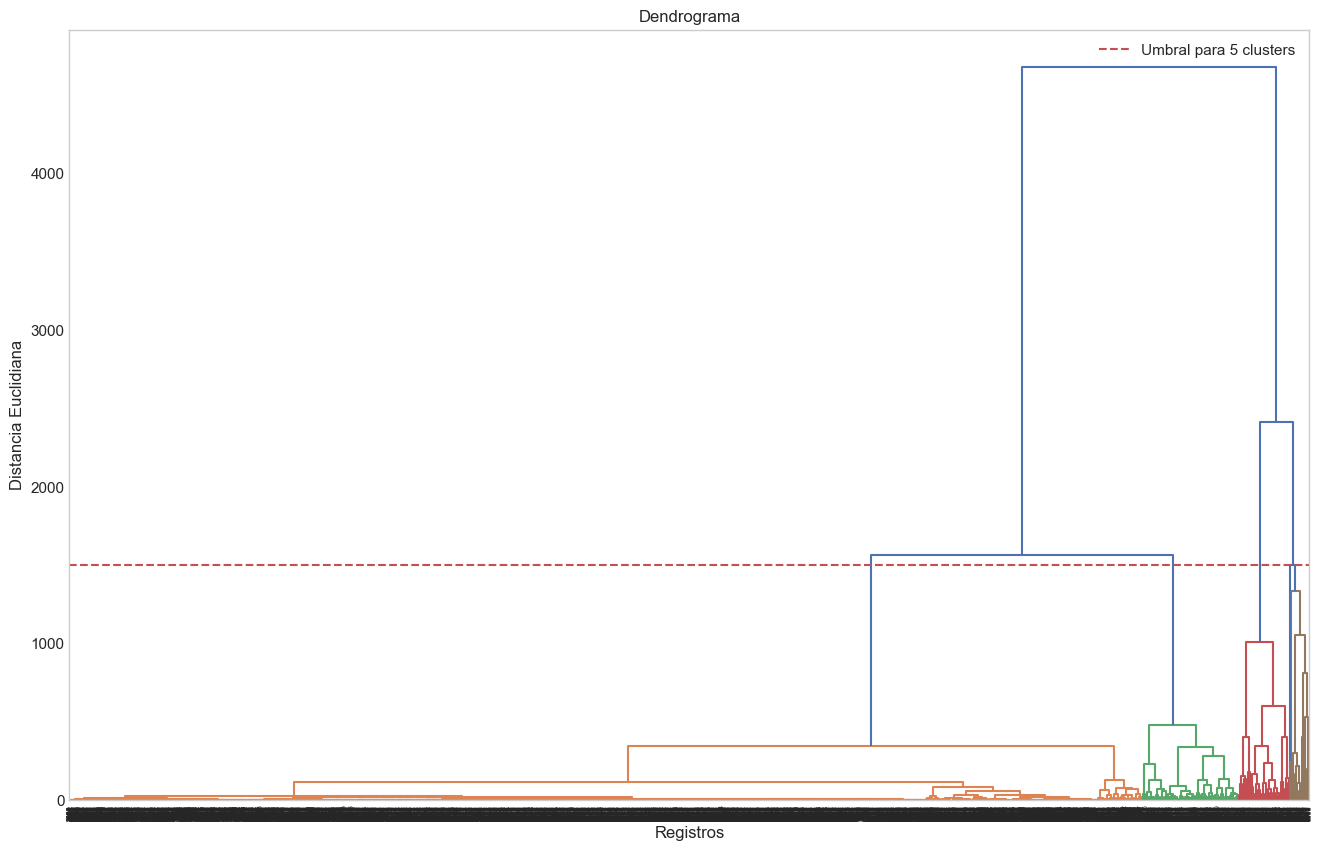

In [794]:
from scipy.cluster.hierarchy import fcluster

# Calcula los clusters
clusters = fcluster(sch.linkage(df_pca, method='ward'), 5, criterion='maxclust')

# Calcula el umbral para 5 clusters
threshold = sch.linkage(df_pca, method='ward')[-(5-1), 2]

# Creamos un dendrograma para visualizar la estructura jerárquica de los clusters
plt.figure(figsize=(16, 10))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'), color_threshold=threshold)
plt.title('Dendrograma')
plt.xlabel('Registros')
plt.ylabel('Distancia Euclidiana')

# Agregar una línea de umbral para 5 clusters
plt.axhline(y=threshold, color='r', linestyle='--', label='Umbral para 5 clusters')

plt.gca().patch.set_facecolor('white')  # Establecer el fondo blanco
plt.grid(False)  # Quitar cualquier cuadrícula
plt.legend()  # Mostrar la leyenda
plt.show()


**Dendograma:**
* A pesar de reducir la dimensionalidad con PCA y de haber escalado previamente los datos con MinMaxScaler y RobustScaler, debido a la diferencia de tamaño y tipo de información que contienen estos clústers, el dendograma nos muestra que seguimos teniendo datos muy dispersos y una dimensionalidad considerable.
* Una solución para el ejercicio sería de seleccionar en el dataset solamente variables que no permitan un **cesgo tan grande y quitar algunas que 'acaparan' el modelo**, siempre y cuando se hayan demostrado poco útiles o redundantes
* Si bien se recomienda hacerlo al principio en el momento de seleccionar las columnas a incorporar al modelo, teniendo un poder computacional que lo permite se ha querido ver cómo trabaja el algorítmo de agrupación y qué tant bueno iba a ser aún teniendo casi todos los datos. 
* Con esto tenemos la prueba visual de que con **entre 3 y 5 clústers, como vimos que se podrían haber elegido mediante el Elbow, es correcto ejecutar k-means**, porque **cuánto más los dividamos, más extrema se hace la diferencia entre el clúster más grande  y los pequeños**. 
* A simple vista y aunque no se ven las letras o números de los registros, y por todas las razones que ya conocemos de los análisis gráficos y estadísticos, **podríamos pensar que el color naranja alargado se corresponde en gran medida al Cluster 0** y que los que quedan están los demás.

## **Ejercicio 3: Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette**

Para este ejercicio, evaluaremos el rendimiento de los algoritmos de clustering utilizando la métrica de silhouette. Calcularemos la silhouette para cada punto de datos en el conjunto de datos agrupado y utilizaremos el valor medio como medida del rendimiento general del clustering. Esto nos permitirá comparar y contrastar el rendimiento de los algoritmos K-means y de clustering jerárquico.



#### **Calculado los Silhouette scores para el mismo número de clústeres => n_clusters=5**

In [795]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# KMeans before PCA
kmeans_before_pca = KMeans(n_clusters=5, random_state=42)
kmeans_labels_before_pca = kmeans_before_pca.fit_predict(df_processed)

# Calculate silhouette score for KMeans before PCA
silhouette_score_before_pca = silhouette_score(df_processed, kmeans_labels_before_pca)
print("Silhouette Score for KMeans before PCA:", silhouette_score_before_pca)
#-------------------------------------------------------------------------------
# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_processed[scaled_columns])

# KMeans after PCA
kmeans_after_pca = KMeans(n_clusters=5, random_state=42)
kmeans_labels_after_pca = kmeans_after_pca.fit_predict(df_pca)

# Calculate silhouette score for KMeans after PCA
silhouette_score_after_pca = silhouette_score(df_pca, kmeans_labels_after_pca)
print("Silhouette Score for KMeans after PCA:", silhouette_score_after_pca)
#-------------------------------------------------------------------------------
# Agglomerative Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical_clustering.fit_predict(df_pca)

# Calculate silhouette score for Agglomerative Clustering
silhouette_score_agglomerative = silhouette_score(df_pca, hierarchical_labels)
print("Silhouette Score for Agglomerative Clustering:", silhouette_score_agglomerative)


Silhouette Score for KMeans before PCA: 0.8189231257536157
Silhouette Score for KMeans after PCA: 0.8257963658284507
Silhouette Score for Agglomerative Clustering: 0.8070151412870082


* Los scores son bastante buenos en los tres casos, más teniendo en cuenta que son 5 clústers y que podríamos haberlo hacho también con 3, lo que hubiese dado resultados más altos aún.
* PCA aporta una pequeña mejora, mientras que el Agglomerative clustering con también 5 clusters, hace bajar un poco el rendimiento.
* Dicho esto, el próximo paso será dejar más libertad al algoritmo AgglomerativeClustering y que encuentre mejores valores con PCA.

#### **Calculado los Silhouette scores para diferentes números de clústeres:**
* Esta vez dejamos que el algorítmo elija las mejores opciones sin especificar ni el número de clústers a elegir, ni en qué random_state quedarse. 
* Nos tiene que dar los scores promedios por el conjunto de clústers que le pedimos calcular (entre 2 y 10) y el promedio general, a ver pudiendo elegir, obtiene mejores resultados.



Número óptimo de clústeres (utilizando Silhouette): 2


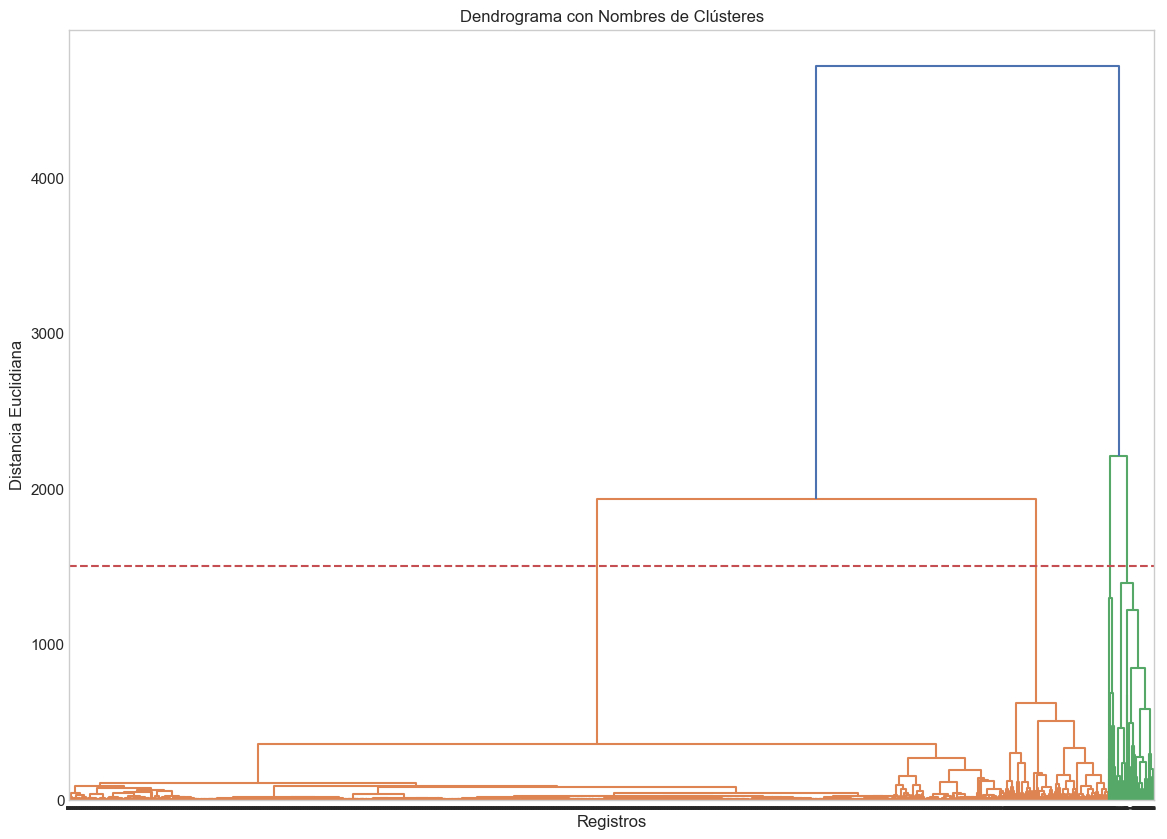

In [796]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Creamos una instancia del modelo AgglomerativeClustering
# Probamos diferentes números de clústeres
min_clusters = 2
max_clusters = 10
scores = []

for n_clusters in range(min_clusters, max_clusters + 1):
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical_labels = hierarchical_clustering.fit_predict(df_pca)
    score = silhouette_score(df_pca, hierarchical_labels)
    scores.append(score)

# Encontramos el número óptimo de clústeres utilizando el método de la silueta
optimal_n_clusters = min_clusters + scores.index(max(scores))
print('\n'"Número óptimo de clústeres (utilizando Silhouette):", optimal_n_clusters)

# Creamos un dendrograma para visualizar la estructura jerárquica de los clústeres
plt.figure(figsize=(14, 10))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method='ward'), labels=hierarchical_labels)

# Agregar una línea de umbral para n clusters
plt.axhline(y=threshold, color='r', linestyle='--', label='Umbral para n clusters')

plt.title('Dendrograma con Nombres de Clústeres')
plt.xlabel('Registros')
plt.ylabel('Distancia Euclidiana')
plt.gca().patch.set_facecolor('white')  # Establecer el fondo blanco
plt.grid(False)  # Quitar cualquier cuadrícula
plt.show()


* El algoritmo  **AgglomerativeClustering iteró entre varias posibilidades** y determinó que lo 'mejor' es tener solamente **2 clústers** 
* El cálculo es : **optimal_n_clusters = min_clusters + scores.index(max(scores))**, donde se buscan en número minimo de clústers junto a los mejores scores.
* Estos dos clústers efectivamente son de tamaños algo más equitativos entre ellos, en comparación con tener 5 clusters, de los cuales 1 muy grande.
* Veamos a continuación por qué el algoritmo considera esta opción como mejor

In [797]:
# Imprimir la lista de scores de la silhouette para cada número de clúster

print("Scores de la silhouette para cada número de clúster:")
for n_clusters, score in zip(range(min_clusters, max_clusters + 1), scores):
    print(f"Número de clústeres: {n_clusters}, Score de la silhouette: {score:.3f}")

from sklearn.metrics import silhouette_score

# Calculem el coeficient de silhouette
silhouette_avg_df_pca = silhouette_score(df_pca, hierarchical_labels)

print('\n'f"El coeficiente de silhouette promedio es: {silhouette_avg_df_pca}")


Scores de la silhouette para cada número de clúster:
Número de clústeres: 2, Score de la silhouette: 0.889
Número de clústeres: 3, Score de la silhouette: 0.877
Número de clústeres: 4, Score de la silhouette: 0.803
Número de clústeres: 5, Score de la silhouette: 0.807
Número de clústeres: 6, Score de la silhouette: 0.808
Número de clústeres: 7, Score de la silhouette: 0.809
Número de clústeres: 8, Score de la silhouette: 0.809
Número de clústeres: 9, Score de la silhouette: 0.810
Número de clústeres: 10, Score de la silhouette: 0.810

El coeficiente de silhouette promedio es: 0.809807545024122


El coeficiente de silhouette varía entre -1 y 1. 
* Un coeficiente de silhouette cercano a 1 indicaría que los puntos están bien agrupados y están separados de otros clústeres.
* Un coeficiente de silhouette cercano a -1 indicaría que los puntos están asignados a clústeres incorrectos.
* Un coeficiente de silhouette cercano a 0 indicaría que los puntos están cerca del límite de decisión entre dos clústeres.
* Por lo tanto, tenemos un **coeficiente de silhouette alto** y sugiere una buena estructura de clúster en el conjunto de datos sin que sea overfitiing. 
* El hecho de que la métrica de silhouette indique que el número óptimo de clústeres es 2 no significa necesariamente que sea la mejor elección en términos de interpretación de los datos. A veces, los algoritmos de agrupamiento pueden sugerir un número de clústeres basado únicamente en medidas internas, como el coeficiente de silhouette, pero esto no tiene en cuenta la interpretación semántica de los datos o del negocio y la coherencia de los clústeres resultantes. 
* Es posible que, aunque el coeficiente de silhouette sea alto para 2 clústeres, la interpretación de los datos sugiera una estructura de clúster más compleja que requiera más de 2 clústeres para capturar adecuadamente la variabilidad en los datos. 

### **En conclusión** 

Hay opciones para elegir 2, 3 o 5 clústers, pero el gráfico del codo (Elbow) con las líneas de valores WCSS y Silhouette, coincdieron en que un clustering de n=5 sería lo más razonable por que mantiene la mayoría de la información fiel a la realidad y los coeficeintes Silhouette del modelo siguen buenos o muy buenos sin caer en el overfittng. Por lo tanto, elegimos quedarnos con un modelo k-means de n_clusters=5 con una reducción de la dimensionalidad usando PCA. 

A nievel de negocio y márketing digital, si pensamos que este dataset le serviría a un comerciante o una marca que vende en directo en una red social, interesaría mirar los datos más relevantes para su actualidad, por ejemplo sería más importante entender el comportamiento de los clientes actuales (2017-2018) y no sería tan relevante conocer los hábitos de los años 2012-2014, en los que por ejemplo se daban mchos 'likes' y 'sads'por ser las herramientas más básicas y que eran casi las únicas que había.  

Por esta razón y por motivos de conocmiento técnico, también sería interesante probar el mismo modelo pero con un dataset escalado que contenga solamente una quincena de variables y que sean de las más cercanas a la actualidad y que sirvan para hacer predicciones que puedan orientar a las marcas en su negocio online, quitando por ejemplo las que vimos que tienen poca correlación con el 'engagement' de su público, como las 9 columnas dummies IDs de usuario (los usuarios entiendo que son ellos mismos (si fuera un estudio de la competencia sí sería relevante)), las columnas 'year' y 'minute', quitando también 'reactions' por ser más genéricas y más antiguas y hamos visto que tienen poco impacto en los demás aspectos. 

Se podría rehacer pues el ejercicio únicamente con las siguientes columnas : 'num_comments', 'num_shares', 'num_loves', 'num_wows', 'day', 'hour', 'Saturday', 'Sunday', 'Workday', 'status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video', 'time_day_afternoon/evening', 'time_day_morning', 'time_day_night. En cuanto a las columnas de tiempo, habría que mirar si es mejor que se queden las dummies de franjas horarias o si dejar las variables numéricas 'day' y 'hour'.